In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import pickle, os

In [3]:
dataset_name = "W14_comb"
df_list = [
           "BES_Panel",
           "BES_reduced_with_na",
#            "BESnumeric"
#            "BES_reduced",
#            "BESnumeric"
          ]

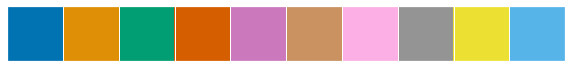

In [4]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
sns.set()
sns.palplot(sns.color_palette("colorblind"))
from IPython.display import display, display_html, HTML
plt.rcParams["axes.grid"] = False

import Jupyter_module_loader
from utility import *
import gaussian_kde


In [5]:
# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
# %matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()



In [6]:
global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
    else:
        globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
        globals()[df].replace(-1,np.nan,inplace=True)
  
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\IPython\core\interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_values"+".csv")

In [7]:
# BES_Panel["lr_scaleW16"].cat.categories

In [12]:
search(BES_reduced_with_na,"profile_gross")

profile_gross_householdW10__£150,000 and over    22543
profile_gross_householdW11__£150,000 and over    22800
profile_gross_householdW12__£150,000 and over    25263
profile_gross_householdW13__£150,000 and over    23264
profile_gross_householdW14__£150,000 and over    22786
profile_gross_household__£150,000 and over       42529
profile_gross_personal__£100,000 and over        44394
dtype: int64

In [13]:
# df["amalgamted_enviroprotection"] = amalgamate_waves(BES_reduced_with_na,"enviroProtection")

pattern = "profile_gross_household__£150,000 and over"
name = pattern
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na
                                 , name, corr_type)
display_corr(df, name, corr_type, text_wrap_length=50)


C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,r,p,N
"profile_gross_householdW10__£150,000 and over",0.9,0.00,17869
"profile_gross_personal__£100,000 and over",0.66,0.00,40659
workingStatusW1W2W3W4W5_Working full time (30 or[...],0.41,0.00,29996
profile_work_statW1_W10_Working full time (30 or[...],0.4,0.00,5895
allSourceIncome_1W6_Yes,0.39,0.00,21670
mainSourceIncomeW6_Earnings from employment (own[...],0.39,0.00,5430
homeAmtbW14__£1 million or above,0.38,0.00,11268
workingStatusW6_W12_Working full time (30 or more[...],0.37,0.00,33866
profile_work_statW7_Working full time (30 or more[...],0.35,0.00,22164
edlevelW1_W6__Postgrad,0.33,0.00,26293


In [14]:
search(BES_Panel,"trump")

happyTrumpW10    30237
dtype: int64

In [15]:
BES_Panel["happyTrumpW10"].value_counts()

Extremely disappointed    12615
5.0                        3492
2.0                        2414
1.0                        2412
3.0                        1811
Don't know                 1757
Extremely happy            1204
4.0                        1076
7.0                        1042
6.0                        1035
8.0                         956
9.0                         423
Name: happyTrumpW10, dtype: int64

In [8]:
# "|".join( BES_Panel["lr_scaleW16"].cat.categories.astype('str') )

In [1012]:
## fix this normally!



Index([  'Libertarian',             0.5,             1.0,             1.5,
                   2.0,             2.5,             3.0,             3.5,
                   4.0,             4.5,             5.0,             5.5,
                   6.0,             6.5,             7.0,             7.5,
                   8.0,             8.5,             9.0,             9.5,
       'Authoritarian'],
      dtype='object')

In [1089]:
al_lr_vals = BES_Panel[search(BES_Panel,"(lr|al)\dW16").index].apply(lambda x: x.cat.codes.replace(-1,np.nan).replace(5,np.nan))
al_lr_scale_vals = BES_Panel[search(BES_Panel,"(lr|al)_scaleW16").index].apply(lambda x: x.cat.codes.replace(-1,np.nan))

al_lr_vals.corrwith(al_lr_scale_vals["lr_scaleW16"])

lr1W16   -0.180397
lr2W16   -0.291976
lr3W16   -0.306779
lr4W16   -0.330690
lr5W16   -0.198713
al1W16    0.023508
al2W16    0.027645
al3W16    0.026907
al4W16    0.009157
al5W16    0.012335
dtype: float64

In [1016]:
al_lr_vals.corrwith(al_lr_scale_vals["al_scaleW16"])

lr1W16   -0.165160
lr2W16   -0.009041
lr3W16   -0.051322
lr4W16    0.011383
lr5W16    0.103197
al1W16    0.815006
al2W16    0.786614
al3W16    0.774973
al4W16    0.648291
al5W16    0.793382
dtype: float64

In [1125]:
search(BES_Panel,"registeredSupporter")
BES_Panel["registeredSupporterNowW16"].value_counts()

Brexit Party                                328
Labour                                      211
Liberal Democrat                            109
Conservative                                 66
Green Party                                  34
Scottish National Party (SNP)                33
Don't know                                   27
Change UK- The Independent Group             26
United Kingdom Independence Party (UKIP)     25
Plaid Cymru                                  18
Other                                        14
Name: registeredSupporterNowW16, dtype: int64

In [1135]:
mask = BES_Panel["registeredSupporterNowW16"].notnull()
BES_Panel["partyMemberNowW16"][mask] = BES_Panel["registeredSupporterNowW16"][mask].values
# BES_Panel["partyMemberNowW16"][mask].shape

In [1136]:
BES_Panel["partyMemberNowW16"].value_counts()

Labour                                      912
Brexit Party                                520
Conservative                                366
Liberal Democrat                            294
Scottish National Party (SNP)               150
Green Party                                 137
Other                                        87
United Kingdom Independence Party (UKIP)     68
Plaid Cymru                                  48
Don't know                                   38
Change UK- The Independent Group             29
Name: partyMemberNowW16, dtype: int64

In [1120]:
search(BES_Panel,"partyMemberNow")
[1,2,3,4,5, 7, 9, 13]

partyMemberNowW6     3101
partyMemberNowW8     2504
partyMemberNowW10    2723
partyMemberNowW11    3182
partyMemberNowW12    3684
partyMemberNowW13     151
partyMemberNowW14    1830
partyMemberNowW15    1612
partyMemberNowW16    1758
dtype: int64

In [1123]:
BES_Panel["partyMemberNowW16"].value_counts()

Labour                                      701
Conservative                                300
Brexit Party                                192
Liberal Democrat                            185
Scottish National Party (SNP)               117
Green Party                                 103
Other                                        73
United Kingdom Independence Party (UKIP)     43
Plaid Cymru                                  30
Don't know                                   11
Change UK- The Independent Group              3
Name: partyMemberNowW16, dtype: int64

In [1108]:
# fix localElectionVote by adding Did Not Vote from localTurnoutRetro
# note that W7 is ... weird
waves = ["W2","W6","W8","W12","W14","W16"]
Probably_didnt_vote_list = ["Don't know","No, did not vote","No, I did not vote"]

for wave in waves:
    if "Did not vote" not in BES_Panel["localElectionVote"+wave].cat.categories:
        BES_Panel["localElectionVote"+wave].cat.add_categories("Did not vote",inplace=True)
    Didnt_vote_not_sure =BES_Panel["localTurnoutRetro"+wave].apply(lambda x: x in Probably_didnt_vote_list).replace(np.nan,False)
    BES_Panel["localElectionVote"+wave][Didnt_vote_not_sure] = "Did not vote"
    BES_Panel["localElectionVote"+wave].replace(98.0,"Don't know")
    if 98.0 in BES_Panel["localElectionVote"+wave].cat.categories:
        BES_Panel["localElectionVote"+wave].cat.remove_categories(98.0,inplace=True)
    



In [1106]:
BES_Panel["localElectionVote"+wave].cat.categories

Index([                                      98.0,
                                   'Conservative',
                                     'Don't know',
                                    'Green Party',
                                         'Labour',
                               'Liberal Democrat',
                                          'Other',
                                    'Plaid Cymru',
                  'Scottish National Party (SNP)',
       'United Kingdom Independence Party (UKIP)',
                                   'Did not vote'],
      dtype='object')

In [1069]:
search(BES_Panel,"localTurnout")

localTurnoutRetroW2     12087
localTurnoutRetroW6     30151
localTurnoutW7          20502
localTurnoutRetroW8     22878
localTurnoutRetroW12    30717
localTurnoutRetroW14    25627
localTurnoutRetroW16    23536
dtype: int64

In [1070]:
BES_Panel["localElectionVoteW7"].value_counts()

Labour                                      4848
Conservative                                4329
Don't know                                  3710
United Kingdom Independence Party (UKIP)    2711
Liberal Democrat                            1269
I would not vote                             831
Green Party                                  734
Other                                        430
Name: localElectionVoteW7, dtype: int64

In [1072]:
BES_Panel["localTurnoutRetroW6"].value_counts()

Yes, voted                                  16173
There wasn't a local election in my area    11218
No, did not vote                             2417
Don't know                                    343
Name: localTurnoutRetroW6, dtype: int64

In [1073]:
BES_Panel["localTurnoutW7"].value_counts()

Very likely that I will vote                12298
Fairly likely                                2728
There are not local elections in my area     1640
Very unlikely that I will vote               1196
Neither likely nor unlikely                   965
Fairly unlikely                               891
Don't know                                    784
Name: localTurnoutW7, dtype: int64

In [10]:
## We should remember this more generally!

In [1094]:
Probably_didnt_vote_list = ["Don't know","No, did not vote","No, I did not vote"]

In [1095]:
Didnt_vote_not_sure =BES_Panel["profile_turnout_2015"].apply(lambda x: x in Probably_didnt_vote_list).replace(np.nan,False)
if "Did not vote" not in BES_Panel["profile_past_vote_2015"].cat.categories:
    BES_Panel["profile_past_vote_2015"].cat.add_categories("Did not vote",inplace=True)
BES_Panel["profile_past_vote_2015"][Didnt_vote_not_sure] = "Did not vote"

In [1096]:
Didnt_vote_not_sure =BES_Panel["profile_turnout_2017"].apply(lambda x: x in Probably_didnt_vote_list).replace(np.nan,False)
if "Did not vote" not in BES_Panel["profile_past_vote_2017"].cat.categories:
    BES_Panel["profile_past_vote_2017"].cat.add_categories("Did not vote",inplace=True)
BES_Panel["profile_past_vote_2017"][Didnt_vote_not_sure] = "Did not vote"

In [1097]:
Didnt_vote_not_sure =BES_Panel["euroTurnoutRetroW16"].apply(lambda x: x in Probably_didnt_vote_list).replace(np.nan,False)
if "Did not vote" not in BES_Panel["euroElectionVoteW16"].cat.categories:
    BES_Panel["euroElectionVoteW16"].cat.add_categories("Did not vote",inplace=True)
BES_Panel["euroElectionVoteW16"][Didnt_vote_not_sure] = "Did not vote"

In [1098]:
Didnt_vote_not_sure =BES_Panel["profile_eurefturnout"].apply(lambda x: x in Probably_didnt_vote_list).replace(np.nan,False)
if "Did not vote" not in BES_Panel["profile_eurefvote"].cat.categories:
    BES_Panel["profile_eurefvote"].cat.add_categories("Did not vote",inplace=True)
BES_Panel["profile_eurefvote"][Didnt_vote_not_sure] = "Did not vote"

In [438]:
set([x.replace("ptv","").split("W")[0] for x in match(BES_Panel,"ptv.*W\d+").index if "xp" not in x.lower()])

{'BNP', 'BrexitParty', 'Con', 'Grn', 'LD', 'Lab', 'PC', 'SNP', 'TIG', 'UKIP'}

In [157]:
BES_Panel["brexitSelfW16"].cat.categories

Index(['Leave the EU without a deal',                           1.0,
                                 2.0,                           3.0,
                                 4.0,                           5.0,
                                 6.0,                           7.0,
                                 8.0,                           9.0,
                  'Remain in the EU',                  'Don't know'],
      dtype='object')

In [ ]:
#### Attempting to create Probability To Vote surfaces on the Political Compass

# Get mean ptv<party> for each Pol Compass sector (at some Granularity)
# Do fancy interpolation to get a surface
    # actually, why not save the interpolation function in a dictionary
# Plot it in 3d
# save surface in dataframe



# start with just
# England_only
# ["Con","Lab","LD","Grn","UKIP","Brexit","TIG","BrexitParty"]

In [633]:
# BES_Panel[match(BES_Panel,"al\d").index][match(BES_Panel,"al\d").index[0]]

In [634]:
# al_vars = match(BES_Panel,"al\d").index
# correct_cat_list = ["Strongly disagree", "Disagree", "Neither agree nor disagree","Agree", "Strongly agree", "Don't know"]

# BES_Panel[al_vars] = \
#     BES_Panel[al_vars].apply(lambda x: x.cat.reorder_categories(correct_cat_list))

In [635]:
# BES_Panel[al_vars].replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1).hist()

In [556]:
BES_Panel["ptvexpgrpW14"].value_counts()

2.0    1185
3.0    1157
7.0    1148
5.0    1119
1.0    1117
4.0    1112
6.0    1101
Name: ptvexpgrpW14, dtype: int64

In [557]:
match(BES_Panel,"ptv.*"+wave+"$", mask = specific_mask)

# could maybe add this in later?
list(range(1,17))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [591]:
granularity = 2
x_axis = pan_dataset_allr_values.columns[0].replace("200",str(granularity-1))
y_axis = pan_dataset_allr_values.columns[1].replace("200",str(granularity-1))
pan_dataset_allr_values[x_axis] = pd.qcut( pan_dataset_allr_values[pan_dataset_allr_values.columns[2]], q=granularity, labels=range(0,granularity))
pan_dataset_allr_values[y_axis] = pd.qcut( pan_dataset_allr_values[pan_dataset_allr_values.columns[3]], q=granularity, labels=range(0,granularity))


In [602]:
( (pan_dataset_allr_values[x_axis] == 1) & (pan_dataset_allr_values[y_axis] == 0) ).sum() / pan_dataset_allr_values.shape[0]

0.24220462915960125

In [726]:
mask.sum()

3385

In [725]:
search(BES_Panel,"wt", mask=mask).sort_values()

howToReduceDeficitW15       0
wt_new_W1_W16             431
wt_new_W1_W14             486
wt_new_W1_W13             533
wt_fresh_W16              541
                         ... 
wt_new_W12               2728
wt_new_W14               2755
wt_new_W15               2782
wt_new_W16               3385
enviroGrowthW16          3385
Length: 79, dtype: int64

In [674]:
BES_Panel["profile_eurefvote"].value_counts()

Stay/remain in the EU    34759
Leave the EU             30637
Did not vote             10076
Don't know                 475
Name: profile_eurefvote, dtype: int64

In [803]:
global best_weight_series
def weighted_mean(series):
    return (series*best_weight_series.loc[series.index]).sum()/(best_weight_series.loc[series.index]).sum()


In [804]:
# mean_like_Corbyn = BES_Panel[[like_var]]\
# .replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)

mask = mean_like_Corbyn.notnull() & specific_mask
N_equal_text = " (N="+str(mask.sum())+")"
global best_weight_series
best_weight_variable = search(BES_Panel,"wt_",mask=mask).sort_values(ascending=False).index[0]
best_weight_series = BES_Panel[best_weight_variable]

likeCorbyn_heatmap = pd.crosstab(index = pan_dataset_allr_values[y_axis][mask],
            columns = pan_dataset_allr_values[x_axis][mask],
            values = mean_like_Corbyn[mask],
            aggfunc = weighted_mean)
likeCorbyn_heatmap

Economic: Left(0) <-> Right(20),0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Social: Liberalism(0) <-> Conservatism(20),,,,,,,,,,,,,,,,,,,,,
0,0.015227,0.020678,0.008021,0.031341,0.069016,0.028649,0.066785,0.074663,0.028307,0.030538,...,0.055772,0.133828,0.045372,0.000000,0.032387,0.084692,0.022790,0.021193,0.113788,0.032673
1,0.028677,0.000000,0.010692,0.008561,0.086684,0.016717,0.022877,0.055171,0.040136,0.079798,...,0.094611,0.000000,0.041935,0.044706,0.093754,0.073029,0.031055,0.078452,0.139250,0.080717
2,0.070310,0.047200,0.036844,0.088266,0.082571,0.038436,0.051613,0.152790,0.022732,0.018907,...,0.082560,0.050490,0.059432,0.052194,0.085083,0.074298,0.035780,0.096381,0.186584,0.040047
3,0.025265,0.069185,0.086275,0.097043,0.042877,0.041371,0.071879,0.080803,0.032671,0.084374,...,0.114214,0.128765,0.117783,0.088472,0.055340,0.031293,0.009638,0.044342,0.080068,0.068820
4,0.061444,0.038958,0.075624,0.044765,0.043566,0.007223,0.072441,0.017591,0.047633,0.047505,...,0.122839,0.038411,0.099573,0.086661,0.062446,0.068956,0.034830,0.062816,0.062671,0.067196
5,0.000000,0.018653,0.009127,0.071023,0.103904,0.123573,0.043272,0.167335,0.080984,0.055385,...,0.077434,0.069973,0.182359,0.153987,0.063553,0.083365,0.041312,0.132900,0.108438,0.048764
6,0.043535,0.008057,0.065107,0.020613,0.113541,0.037389,0.066393,0.100339,0.012306,0.068103,...,0.097008,0.080196,0.065399,0.067152,0.071954,0.103257,0.105970,0.098933,0.091364,0.033782
7,0.035834,0.080488,0.042249,0.159466,0.084287,0.030989,0.125794,0.072065,0.113025,0.080733,...,0.038542,0.021952,0.081788,0.055086,0.061127,0.061935,0.029103,0.058796,0.083712,0.022930
8,0.055353,0.078431,0.093553,0.006788,0.099316,0.096983,0.066428,0.111025,0.039994,0.071951,...,0.106612,0.054975,0.041393,0.152212,0.056869,0.066053,0.103422,0.068189,0.136377,0.042516


2150

In [727]:

best_weight_variable
# BES_Panel["wt_new"]

'wt_new_W16'

In [730]:
mean_like_Corbyn[mask]*BES_Panel[best_weight_variable][mask]

2         4.145732
13        0.000000
30        4.145029
35        8.131530
43       11.508063
           ...    
68372     1.265841
68375     5.362745
68386     0.000000
68423     5.459262
68429     0.000000
Length: 3385, dtype: float64

In [758]:
indices = mean_like_Corbyn[mask].groupby(pan_dataset_allr_values[x_axis][mask]).apply(lambda x: (x.index))
[np.max([y for y in x]) for x in indices]

[92541,
 92584,
 92551,
 92586,
 92561,
 92563,
 92579,
 92582,
 92568,
 92495,
 92578,
 92580,
 92560,
 92558,
 92583,
 92585,
 92565,
 92575,
 92581,
 92571,
 92459]

In [808]:
search(BES_Panel,"al_scale")

al_scaleW1W2W3W4W5    37717
al_scaleW6            27200
al_scaleW7W8W9        35873
al_scaleW10W11W12     30088
al_scaleW13           27253
al_scaleW14W15        31629
al_scaleW16           32671
dtype: int64

In [820]:
for al_var in search(BES_Panel,"al_scale").index:
    BES_Panel[al_var] = BES_Panel[al_var].cat.reorder_categories(['Libertarian', 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
                                                                  5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 'Authoritarian',])
for lr_var in search(BES_Panel,"lr_scale").index:
    BES_Panel[lr_var] = BES_Panel[lr_var].cat.reorder_categories([  'Left',    0.5,     1.0,     1.5,     2.0,     2.5,     3.0,     3.5,     4.0,
           4.5,     5.0,     5.5,     6.0,     6.5,     7.0,     7.5,     8.0,
           8.5,     9.0,     9.5, 'Right'])


In [825]:
pan_dataset_allr_values["original_al_scale"] = BES_Panel[[x for x in BES_Panel.columns if "al_scale" in x]]\
    .apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)
pan_dataset_allr_values["original_lr_scale"] = BES_Panel[[x for x in BES_Panel.columns if "lr_scale" in x]]\
    .apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)


In [854]:
# 

# %%time
# plt.figure(figsize=(16,12))
# plt.rcParams["axes.grid"] = False
# mask = pan_dataset_allr_values["original_al_scale"].notnull() & pan_dataset_allr_values["original_lr_scale"].notnull()
# sns.kdeplot(pan_dataset_allr_values["original_lr_scale"][mask],
#             pan_dataset_allr_values["original_al_scale"][mask], cbar=True,shade=True)
# plt.xlim([0,20])
# plt.ylim([0,20])

In [929]:

BES_Panel["euRefVoteW8"].value_counts()

Leave the EU             15793
Stay/remain in the EU    15215
Don't know                2018
I would/will not vote      475
Name: euRefVoteW8, dtype: int64

In [930]:
BES_Panel["euRefVoteW7"].value_counts()

Stay/remain in the EU    14352
Leave the EU             13692
Don't know                2314
I would/will not vote      537
Name: euRefVoteW7, dtype: int64

In [1056]:
search(BES_Panel,"partyIdW\d+")

partyIdW1     30309
partyIdW2     30227
partyIdW3     27819
partyIdW4     31441
partyIdW6     30151
partyIdW7     30895
partyIdW8     33502
partyIdW9     30036
partyIdW10    30237
partyIdW11    30956
partyIdW12    34394
partyIdW13    31136
partyIdW14    31063
partyIdW15    30601
partyIdW16    37959
dtype: int64

In [1059]:
BES_Panel["partyIdW1"].cat.categories

Index(['British National Party (BNP)', 'Conservative', 'Don't know',
       'Green Party', 'Labour', 'Liberal Democrat', 'No - none', 'Other',
       'Plaid Cymru', 'Scottish National Party (SNP)',
       'United Kingdom Independence Party (UKIP)'],
      dtype='object')

In [1099]:
replace_dict = {'Labour Party':"LAB", 
 'United Kingdom Independence Party (UKIP)':"UKIP",
 'Labour':"LAB",
 'Conservative Party':"CON",
 'Conservative':"CON",
 'Liberal Democrats':"LD",
 'Did not vote':"DNV",
 'Scottish National Party':"SNP",
 'Scottish National Party (SNP)':"SNP",
 'British National Party (BNP)':"BNP",
 'Green Party':"GRN",
 'Liberal Democrat':"LD",
 "Don't know":"DK",
 'Some other party':"OTH",
 'Veritas':"VER",
 'Plaid Cymru':"PC",
 'Other':"OTH",
 'Respect':"RES",
 'I would not vote':"DNV",
 'No - none':"NON",
 "Brexit Party":"BXP",
 'Change UK- The Independent Group':"CUK",
 "Leave the EU":"LEAVE",
 "Stay/remain in the EU":"REMAIN",}

In [1100]:
party_colour_dict = {"Lab":"red","LAB":"red",
                     "Con":'blue',"CON":'blue',"UKIP":"purple","LD":"orange",
                     "Grn":'green',"GRN":'green',
                     "BrexitParty":"cyan","BXP":'cyan',
                     "TIG":"pink","BNP":"magenta",
                     "SNP":'yellow',"PC":'olive',
                     "Remain":"yellow","REMAIN":'yellow',"Leave":"blue","LEAVE":'blue',
                     "Don't know":"grey","DK":'grey',
                     "Won't vote":"black","DNV":'black',"NON":'black',
                     }

In [1173]:
# temp = match(BES_Panel,"like(.*)W\d+", mask = BES_Panel["country"]=="England").index
# temp
# [x for x in temp if re.match("like(.*)W\d+",x).groups()[0] in ["Con","Lab","SNP","PC","UKIP","Grn","BNP","LD","BrexitParty","TIG","SNPExtra","CandA","CandB"]]
match(BES_Panel,"likeLD")

likeLDW1     15225
likeLDW2     15038
likeLDW3     13854
likeLDW4     15642
likeLDW5     15375
likeLDW6     14960
likeLDW7     30895
likeLDW8     33502
likeLDW9     30036
likeLDW10    30237
likeLDW11    30956
likeLDW12    34394
likeLDW13    31136
likeLDW14    31063
likeLDW15    30842
likeLDW16    37959
dtype: int64

In [1168]:
BES_Panel["likeLDW1"].cat.categories

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'Don't know',
       'Strongly dislike', 'Strongly like'],
      dtype='object')

In [1198]:
%%time
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import colors
import matplotlib.patches as mpatches

sns.set(font_scale=2.5)

wave_descriptions = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"][["Wave No","Friendlier_Description"]].set_index("Wave No")

granularity = 21
x_axis = pan_dataset_allr_values.columns[0].replace("200",str(granularity-1)).replace("{uniform}","")
y_axis = pan_dataset_allr_values.columns[1].replace("200",str(granularity-1)).replace("{uniform}","")
pan_dataset_allr_values[x_axis] = pd.qcut( pan_dataset_allr_values[pan_dataset_allr_values.columns[2]], q=granularity, labels=range(0,granularity))
pan_dataset_allr_values[y_axis] = pd.qcut( pan_dataset_allr_values[pan_dataset_allr_values.columns[3]], q=granularity, labels=range(0,granularity))
# pan_dataset_allr_values[x_axis] = pd.qcut( pan_dataset_allr_values["original_lr_scale"], q=granularity, labels=range(0,granularity))
# pan_dataset_allr_values[y_axis] = pd.qcut( pan_dataset_allr_values["original_al_scale"], q=granularity, labels=range(0,granularity))

output_granularity=800
min_sample_size =100    
smoothing = 50.0
pop_gridlines = False
max_z_size = 10.0
normalize_heights = False
use_bes_weights = True
bes_wave_based = True
break_single_variable = False

# stub_var = "partyId"
stub_var = "like"
title_base = "How much do you like or dislike each of the following parties?"
scale_text = ' 0-Strongly dislike, 10-Strongly like'

# search(BES_Panel,"partyMemberNow")
# [1,2,3,4,5, 7, 9, 13]
if use_bes_weights:
    aggfunc = weighted_mean
else:
    aggfunc = np.mean

region = "England"
specific_mask = (BES_Panel["country"]==region)# & (BES_Panel["profile_eurefvote"]=="Leave the EU")
# specific_mask = BES_Panel["id"].notnull()
# ["W2","W6","W8","W12","W14","W16"]
max_wave = 17
skip_waves = [5]
skip_waves = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,13,15 ]
skip_waves = [1,2,3,4,5, 7, 9, 13]
skip_waves = [1]
wave_list = ["W"+str(x) for x in list(range(1,max_wave)) if x not in skip_waves]
# wave_list = [str(x) for x in [2005,2010,2015,2017]]
for wave in wave_list:
    if bes_wave_based:
        wave_no = int(wave.replace("W",""))
        title_extra = "\n"+wave_descriptions.loc[wave_no].values[0]#+"; "+region#+"&Leave-2016"
    else:
        title_extra = "\n"+wave#+"; "+region#+"&Leave-2016"

# treatment = "brexitself_surface"
#     treatment = "ptv_surface"+wave+"_" + region# + "_LEAVE2016"
    treatment = stub_var+"_surface"+wave#+"originalPC"#+"_"
    
    if region is not None:
            treatment = treatment+"_"+region
            title_extra = title_extra+"; "+region
    output_subfolder = create_subdir(BES_output_folder, treatment)

# party_list = ["Lab","Con","LD","Grn","UKIP","TIG","BrexitParty"]
# party_list = ["ptv"+x for x in party_list]
# party_list = ["brexitSelf"]
    if break_single_variable:
        df1 = pd.get_dummies(BES_Panel[stub_var+wave])
        mask = BES_Panel[stub_var+wave].notnull() & specific_mask
#     eurevote_col_replace_dict = {"Don't know":"Don't know", "I would/will not vote":"Won't vote", "Leave the EU":"Leave",
#                   "Stay/remain in the EU":"Remain"}
        df1.columns = [replace_dict[x] for x in df1.columns]
        party_list = df1.columns
    else:
    ## sample size!
        temp = match(BES_Panel,"like(.*)"+wave+"$", mask = specific_mask)
        party_list = list(temp[temp>min_sample_size].index)
        party_list = [x for x in party_list if re.match("like(.*)W\d+",x).groups()[0] in ["Con","Lab","SNP","PC","UKIP","Grn","BNP","LD","BrexitParty","TIG"]]
        print(party_list)
#     temp = match(BES_Panel,"ptv.*"+wave+"$", mask = specific_mask)
#     party_list = list(temp[temp>min_sample_size].index)
    
    

    
    # specific_mask = 1

    interp_dict = {}

    largestN = 0


    for party in party_list:
        print(party)
    #     like_var = "ptv"+party
        like_var = party

        like_name = "probability to vote "+party
#         scale_text = ' 0-Very Unlikely, 10-Very Likely'
        title_text = title_base+like_var+title_extra
#         title_text = "Which party do you feel closest to: "+like_var+"?"+title_extra
        

    #     like_name = "Some people want to leave the European Union immediately without a deal.\nOther people would like to cancel Brexit and remain in the EU.\nWhere would you place yourself and the political parties on this scale?"
    #     scale_text = ' 0-Leave the EU without a deal, 10-Remain in the EU'    
    #     title_text = like_name

        # fix disordered categories!
        if "ptv" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['Very unlikely','1', '2', '3', '4', '5', '6', '7', '8', '9',
                       'Very likely', "Don't know" ]))    
        elif "like" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['Strongly dislike','1', '2', '3', '4', '5', '6', '7', '8', '9', "Don't know",
        'Strongly like']))                
            
            

        # mean across all waves
    #     mean_like_Corbyn = BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
    #     .replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)

#         mean_like_Corbyn = BES_Panel[[like_var]]\
#         .replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)
        if break_single_variable:
            mean_like_Corbyn = df1[like_var]
        else:
            mean_like_Corbyn = BES_Panel[[like_var]]\
            .replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)          
            mask = mean_like_Corbyn.notnull() & specific_mask

#         
        N_equal_text = " (N="+str(mask.sum())+")"
        
        global best_weight_series
        best_weight_variable = search(BES_Panel,"wt_",mask=mask).sort_values(ascending=False).index[0]
        best_weight_series = BES_Panel[best_weight_variable]

        likeCorbyn_heatmap = pd.crosstab(index = pan_dataset_allr_values[y_axis][mask],
                    columns = pan_dataset_allr_values[x_axis][mask],
                    values = mean_like_Corbyn[mask],
                    aggfunc = aggfunc)

        plt.figure(figsize = (16,10))
        ax = sns.heatmap(data = likeCorbyn_heatmap.replace(np.nan,-1),
                    cbar_kws={'label': like_var+ scale_text})
        ax.invert_yaxis()

        plt.xlim([0,granularity])
        plt.ylim([0,granularity])
        plt.xlabel(x_axis);
        plt.ylabel(y_axis);
        plt.title(title_text+N_equal_text)
        plt.savefig(BES_output_folder + treatment + os.sep + like_var +"_by_PC_heatmap" + ".png",
                   bbox_inches='tight')
        plt.close()

        #### INTERPOLATE

        size = likeCorbyn_heatmap.columns.max()
        x,y = np.mgrid[ 0:size:granularity*1j, 0:size:granularity*1j ]
        z =  likeCorbyn_heatmap.values.flatten()
        non_null_mask = ~np.isnan(z)
        x = x.flatten()[non_null_mask]
        y = y.flatten()[non_null_mask]
        z = z[non_null_mask]
        print("There are " + str(np.sum(~non_null_mask)) + " nulls") 
        interp_dict[party]=interpolate.Rbf(x,y,z,function='linear',smooth=smoothing)


        grid=np.mgrid[0:size:1j*output_granularity,
                       0:size:1j*output_granularity]
        result=interp_dict[party](grid[0,:,:],grid[1,:,:]);
        plt.figure(figsize=(14,14));
        img = plt.imshow(result,interpolation = 'none',origin ='lower',
                  extent = (0,granularity-1,0,granularity-1)); #Apparently nice smooth linear-ish interpolation
        plt.grid(None)
        plt.locator_params(nbins=5)
        cbar = plt.colorbar(img,shrink=0.5, aspect=5, label =  like_var+ scale_text );#, title = "\n".join(scale_text.split(",")) );
        plt.xlabel(x_axis);
        plt.ylabel(y_axis);
        plt.title(title_text+N_equal_text)
        plt.savefig(BES_output_folder + treatment + os.sep + like_var +"_by_PC_interpolated" + ".png",
                   bbox_inches='tight')
        plt.close()



        ### 3D Surface

        X,Y = grid
        Z = result.reshape(X.shape)
        # this seems to flip the axes!
        # Plot the surface.
        fig = plt.figure(figsize=(14,14));

        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)

        ax.set_title(title_text+N_equal_text, fontsize=18)
        # Customize the z axis.
        ax.set_zlim(0, max_z_size);
#         ax.zaxis.set_major_locator(LinearLocator(10));
        plt.xlabel(y_axis, fontsize=14);
        plt.ylabel(x_axis, fontsize=14);
        ax.set_zlabel(like_var+ scale_text, fontsize=14);
        plt.locator_params(nbins=5)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.tick_params(axis='both', which='minor', labelsize=14)


        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5);

    #     fig.show();
        fig.savefig(BES_output_folder + treatment + os.sep + like_var +"_by_PC_3D" + ".png",
                   bbox_inches='tight')
        plt.close()
        
        if mask.sum()>largestN:
            largestN = mask.sum()
        

    ###################

    
    overall_N_equal_text = " (N="+str(largestN)+")"

#     output_granularity=500
    grid=np.mgrid[0:size:1j*output_granularity,
                   0:size:1j*output_granularity]

    df = pd.DataFrame()
    for party in party_list:
        df[party]=interp_dict[party](grid[0,:,:],grid[1,:,:]).flatten()

    #df["max"] = df.max(axis=1)
    # df["leading_party"] = df.apply(lambda x: x.index[x[df.columns]==x["max"]][0],axis=1) # slow ~ 30s


    df["leading_party"] = df.idxmax(axis=1)
    df["max"] = df.max(axis=1)/max_z_size
    surf_min = df["max"].min()
    surf_max = df["max"].max()
    if normalize_heights:       
        df["max"] = ( df["max"]-surf_min ) / (surf_max-surf_min )

    ######################

    dominant_parties = list(df["leading_party"].value_counts().index)
    display(df["leading_party"].value_counts())

# "Remain":"yellow","Leave":"blue",

    legend_patch_list = []

    count = 0
    colour_list = []
    repl_dict = {}
    for party in dominant_parties:
        repl_dict[party] = count

        party_name = party.replace("ptv","").split("W")[0]
        party_name = party.replace("like","").split("W")[0]
        colour = party_colour_dict[ party_name ]
        colour_list.append( colour )
        legend_patch_list.append( mpatches.Patch(color=colour, label=party_name) )
        count=count+1

    #######################


#     cmap = colors.ListedColormap(colour_list)
#     bounds=list(range(0,np.max(list(repl_dict.values()))+2))

#     norm = colors.BoundaryNorm(bounds, cmap.N)
#     colour_list = ["yellow","blue"]
    

    from matplotlib import colors as mcolors
    color_dict = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)


#     colour_list = ['yellow','blue']
    eta = .001
    cdict = {'red':[],'green':[],'blue':[],'alpha':[]}

    n = len(colour_list)
    anchor_pts = np.linspace(0.0,1.0,n+1)

    for col_no in range(0,n):
        x = anchor_pts[col_no]
        col = mcolors.to_rgba( color_dict[ colour_list[col_no] ] )
        cdict['red'].append(   (x,col[0],col[0]) )
        cdict['green'].append( (x,col[1],col[1]) )
        cdict['blue'].append(  (x,col[2],col[2]) )
        cdict['alpha'].append(  (x,0.0,0.0 ) )

        x = anchor_pts[col_no+1]-eta
        if col_no ==(n-1):
            x = x+eta
        col = mcolors.to_rgba( color_dict[ colour_list[col_no] ] )
        cdict['red'].append(   (x,col[0],col[0]) )
        cdict['green'].append( (x,col[1],col[1]) )
        cdict['blue'].append(  (x,col[2],col[2]) )
        cdict['alpha'].append(  (x,1.0,1.0 ) )

    plt.register_cmap(name='test', data=cdict)

    df["leading_party"] = df["leading_party"].replace(repl_dict).astype('float')
#     df["leading_party"] = 1.0-df["leading_party"]

    res = df["leading_party"].values.reshape((output_granularity,output_granularity))
    res = (df["leading_party"]+df["max"]).values.reshape((output_granularity,output_granularity))

    ######################
#     plt.rcParams["axes.grid"] = False
#     title_text = "Which parties have the highest Probability To Ever Vote\nat any given Political Compass position?"+title_extra
#     title_text = "How would/did/would you vote (again) in an EU referendum?"+title_extra
#     title_text = "How would you vote in the next General Election?"+title_extra
    patchwork_title_text = title_base+title_extra
    

    # make a color map of fixed colors
    plt.figure(figsize=(14,14));
    # tell imshow about color map so that only set colors are used
    print(np.min(res),np.max(res),len(colour_list))
    img = plt.imshow(res/len(colour_list), origin='lower',
                  cmap='test',interpolation='none',norm=None,vmin=0.0, vmax=1.0,
                  extent = (0,granularity-1,0,granularity-1) )
#                         cmap=cmap, norm=norm,
    from matplotlib import cm
    import matplotlib.ticker as ticker
    def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
        new_cmap = colors.LinearSegmentedColormap.from_list(
            'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
            cmap(np.linspace(minval, maxval, n)))
        return new_cmap

    cmap = plt.get_cmap('test')
    new_cmap = truncate_colormap(cmap, 0.0, 1.0/n, 1000)    
    
    plt.colorbar(cm.ScalarMappable(norm=cm.colors.Normalize(vmax=surf_min*max_z_size, vmin=surf_max*max_z_size),
                                   cmap=new_cmap),shrink=0.5, label = scale_text, format=ticker.FormatStrFormatter('{:.1g}'))
    
    plt.xlabel(x_axis);
    plt.ylabel(y_axis);
#     plt.rcParams["axes.grid"] = False
    plt.title(patchwork_title_text+overall_N_equal_text)
    plt.locator_params(nbins=5)
    plt.grid(None)

    if pop_gridlines==True:

        hmax = sns.kdeplot(pan_dataset_allr_values[x_axis][specific_mask],pan_dataset_allr_values[y_axis][specific_mask],
                           cut=0, alpha=.2)
        hmax.collections[0].set_alpha(0)


    plt.legend(handles=legend_patch_list, bbox_to_anchor=(0.5, -0.095),loc="upper center",
               fancybox=True, shadow=True, title="Dominant Party (in territory size order)", ncol=5, fontsize=14)
    plt.annotate(dataset_citation, (0,0), (0, -170),
                     xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) ;     


    plt.savefig(BES_output_folder + treatment + os.sep + "all_ptv_surfaces"+"_by_PC_territory" + ".png",
                bbox_inches='tight')
    plt.close()

    ######################################

    X,Y = grid
    Z = df["max"].values.reshape(X.shape)
    # this seems to flip the axes!
    # Plot the surface.
    fig = plt.figure(figsize=(14,14));

    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    ax.set_title(title_text+overall_N_equal_text, fontsize=18)

    # Customize the z axis.
    ax.set_zlim(0, max_z_size);
#     ax.zaxis.set_major_locator(LinearLocator(10));
    plt.xlabel(y_axis, fontsize=14);
    plt.ylabel(x_axis, fontsize=14);
    plt.locator_params(nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=14)
    ax.set_zlabel(patchwork_title_text+overall_N_equal_text, fontsize=14);
    
    fig.savefig(BES_output_folder + treatment + os.sep + "all_ptv_surfaces" +"_by_PC_3D" + ".png",
               bbox_inches='tight')
    plt.close()
    ################

    plt.figure(figsize=(14,14));
    img = plt.imshow(Z,interpolation = 'none',origin ='lower',
              extent = (0,granularity-1,0,granularity-1)); #Apparently nice smooth linear-ish interpolation
    plt.grid(None)
    plt.locator_params(nbins=5)
    cbar = plt.colorbar(img,shrink=0.5, aspect=5, label = scale_text);
    plt.xlabel(x_axis);
    plt.ylabel(y_axis);
    plt.title(patchwork_title_text+overall_N_equal_text)
    plt.savefig(BES_output_folder + treatment + os.sep + "all_ptv_surfaces" +"_by_PC_interpolated" + ".png",
                bbox_inches='tight')
    plt.close()
gc.collect()

# plt.xticks(fontsize=14, rotation=90)

['likeConW2', 'likeLabW2', 'likeLDW2', 'likeUKIPW2', 'likeGrnW2', 'likeBNPW2']
likeConW2
There are 0 nulls
likeLabW2
There are 0 nulls
likeLDW2
There are 0 nulls
likeUKIPW2
There are 0 nulls
likeGrnW2
There are 0 nulls
likeBNPW2
There are 0 nulls


likeLabW2     284113
likeConW2     231046
likeGrnW2      89898
likeUKIPW2     34943
Name: leading_party, dtype: int64

0.4117774295242452 3.5149312403230937 4
['likeConW3', 'likeLabW3', 'likeLDW3', 'likeUKIPW3', 'likeGrnW3', 'likeBNPW3']
likeConW3
There are 0 nulls
likeLabW3
There are 0 nulls
likeLDW3
There are 0 nulls
likeUKIPW3
There are 0 nulls
likeGrnW3
There are 0 nulls
likeBNPW3
There are 0 nulls


likeLabW3     337211
likeConW3     226346
likeUKIPW3     38893
likeGrnW3      35271
likeLDW3        2279
Name: leading_party, dtype: int64

0.4180163435865884 4.481600311486094 5
['likeConW4', 'likeLabW4', 'likeLDW4', 'likeUKIPW4', 'likeGrnW4', 'likeBNPW4']
likeConW4
There are 0 nulls
likeLabW4
There are 0 nulls
likeLDW4
There are 0 nulls
likeUKIPW4
There are 0 nulls
likeGrnW4
There are 0 nulls
likeBNPW4
There are 0 nulls


likeLabW4     382900
likeConW4     243130
likeLDW4       10082
likeUKIPW4      3393
likeGrnW4        495
Name: leading_party, dtype: int64

0.44145708004416423 4.6014890640850235 5
['likeConW5', 'likeLabW5', 'likeLDW5', 'likeUKIPW5', 'likeGrnW5', 'likeBNPW5']
likeConW5
There are 0 nulls
likeLabW5
There are 0 nulls
likeLDW5
There are 0 nulls
likeUKIPW5
There are 0 nulls
likeGrnW5
There are 0 nulls
likeBNPW5
There are 0 nulls


likeLabW5     362055
likeConW5     243509
likeUKIPW5     20352
likeLDW5       12355
likeGrnW5       1729
Name: leading_party, dtype: int64

0.4516680674534406 4.648924173801161 5
['likeConW6', 'likeLabW6', 'likeLDW6', 'likeSNPW6', 'likeUKIPW6', 'likeGrnW6', 'likeBNPW6']
likeConW6
There are 0 nulls
likeLabW6
There are 0 nulls
likeLDW6
There are 0 nulls
likeSNPW6
There are 0 nulls
likeUKIPW6
There are 0 nulls
likeGrnW6
There are 0 nulls
likeBNPW6
There are 0 nulls


likeLabW6     310378
likeConW6     258516
likeGrnW6      30409
likeUKIPW6     28556
likeLDW6       12141
Name: leading_party, dtype: int64

0.4210572673443297 4.537873444223206 5
['likeConW7', 'likeLabW7', 'likeLDW7', 'likeUKIPW7', 'likeGrnW7']
likeConW7
There are 0 nulls
likeLabW7
There are 0 nulls
likeLDW7
There are 0 nulls
likeUKIPW7
There are 0 nulls
likeGrnW7
There are 0 nulls


likeLabW7     362967
likeConW7     222239
likeUKIPW7     28888
likeLDW7       25906
Name: leading_party, dtype: int64

0.42261208708561177 3.5701607402073274 4
['likeConW8', 'likeLabW8', 'likeLDW8', 'likeUKIPW8', 'likeGrnW8']
likeConW8
There are 0 nulls
likeLabW8
There are 0 nulls
likeLDW8
There are 0 nulls
likeUKIPW8
There are 0 nulls
likeGrnW8
There are 0 nulls


likeLabW8     355483
likeConW8     205696
likeUKIPW8     62001
likeLDW8       16820
Name: leading_party, dtype: int64

0.42893306368848344 3.550264031691291 4
['likeConW9', 'likeLabW9', 'likeLDW9', 'likeUKIPW9', 'likeGrnW9']
likeConW9
There are 0 nulls
likeLabW9
There are 0 nulls
likeLDW9
There are 0 nulls
likeUKIPW9
There are 0 nulls
likeGrnW9
There are 0 nulls


likeLabW9     330334
likeConW9     243823
likeLDW9       51845
likeUKIPW9     13998
Name: leading_party, dtype: int64

0.41247134272276964 3.4900420955636773 4
['likeConW10', 'likeLabW10', 'likeLDW10', 'likeUKIPW10', 'likeGrnW10']
likeConW10
There are 0 nulls
likeLabW10
There are 0 nulls
likeLDW10
There are 0 nulls
likeUKIPW10
There are 0 nulls
likeGrnW10
There are 0 nulls


likeConW10     298020
likeLabW10     220141
likeGrnW10      78807
likeLDW10       21544
likeUKIPW10     21488
Name: leading_party, dtype: int64

0.4199531118133234 4.508328095703256 5
['likeConW11', 'likeLabW11', 'likeLDW11', 'likeSNPW11', 'likeUKIPW11', 'likeGrnW11']
likeConW11
There are 0 nulls
likeLabW11
There are 0 nulls
likeLDW11
There are 0 nulls
likeSNPW11
There are 0 nulls
likeUKIPW11
There are 0 nulls
likeGrnW11
There are 0 nulls


likeConW11     315343
likeLabW11     236394
likeGrnW11      57117
likeLDW11       27473
likeUKIPW11      3673
Name: leading_party, dtype: int64

0.4402190924809005 4.487484890056896 5
['likeConW12', 'likeLabW12', 'likeLDW12', 'likeSNPW12', 'likeUKIPW12', 'likeGrnW12']
likeConW12
There are 0 nulls
likeLabW12
There are 0 nulls
likeLDW12
There are 0 nulls
likeSNPW12
There are 0 nulls
likeUKIPW12
There are 0 nulls
likeGrnW12
There are 0 nulls


likeLabW12    339313
likeConW12    283655
likeLDW12      17032
Name: leading_party, dtype: int64

0.45517356336974385 2.5683181546469607 3
['likeConW13', 'likeLabW13', 'likeLDW13', 'likeSNPW13', 'likeUKIPW13', 'likeGrnW13']
likeConW13
There are 0 nulls
likeLabW13
There are 0 nulls
likeLDW13
There are 0 nulls
likeSNPW13
There are 0 nulls
likeUKIPW13
There are 0 nulls
likeGrnW13
There are 0 nulls


likeLabW13    406083
likeConW13    224367
likeLDW13       9550
Name: leading_party, dtype: int64

0.4469715626014521 2.5528593310226917 3
['likeConW14', 'likeLabW14', 'likeLDW14', 'likeUKIPW14', 'likeGrnW14']
likeConW14
There are 0 nulls
likeLabW14
There are 0 nulls
likeLDW14
There are 0 nulls
likeUKIPW14
There are 0 nulls
likeGrnW14
There are 0 nulls


likeConW14    282770
likeLabW14    264437
likeGrnW14     63594
likeLDW14      29199
Name: leading_party, dtype: int64

0.39994531683782275 3.5520194562371135 4
['likeConW15', 'likeLabW15', 'likeLDW15', 'likeUKIPW15', 'likeGrnW15', 'likeTIGW15', 'likeBrexitPartyW15']
likeConW15
There are 0 nulls
likeLabW15
There are 0 nulls
likeLDW15
There are 0 nulls
likeUKIPW15
There are 0 nulls
likeGrnW15
There are 0 nulls
likeTIGW15
There are 0 nulls
likeBrexitPartyW15
There are 0 nulls


likeGrnW15            286263
likeConW15            249247
likeLabW15             61794
likeBrexitPartyW15     23789
likeLDW15              10047
likeUKIPW15             8860
Name: leading_party, dtype: int64

0.35763838815472965 5.443585954694414 6
['likeConW16', 'likeLabW16', 'likeLDW16', 'likeUKIPW16', 'likeGrnW16', 'likeBrexitPartyW16', 'likeTIGW16']
likeConW16
There are 0 nulls
likeLabW16
There are 0 nulls
likeLDW16
There are 0 nulls
likeUKIPW16
There are 0 nulls
likeGrnW16
There are 0 nulls
likeBrexitPartyW16
There are 0 nulls
likeTIGW16
There are 0 nulls


likeGrnW16            319683
likeBrexitPartyW16    197653
likeConW16             98661
likeLDW16              24003
Name: leading_party, dtype: int64

0.4170558767452695 3.5683211255892404 4
Wall time: 21min 2s


5

In [1199]:
### build animated gif


filename_list = []
sorted_wavelist = []
# skip_waves = [ 1, 3, 4, 5, 7, 9, 10,11,13,15 ]
for wave in wave_list:
    
    wave_no = int(wave.replace("W",""))
    sorted_wavelist.append(wave_no)
#     treatment = "ptv_surface"+wave+"_" + region + "_LEAVE2016"
    treatment = stub_var+"_surface"+wave#+"originalPC"#+"_"
    if region is not None:
            treatment = treatment+"_"+region
#     treatment = "eurefvote_surface"+wave+"originalPC"
    
    filename_list.append( BES_output_folder + treatment + os.sep + "all_ptv_surfaces"+"_by_PC_territory" + ".png" )



import imageio


images = []
for filename in filename_list:
    images.append(imageio.imread(filename))
images.append(imageio.imread(filename)) # last slide delay doesn't seem to be being respected on twitter - so add the last one twice
sorted_wavelist.append(wave_no)
imageio.mimsave(BES_output_folder + treatment + os.sep +'animated_ptv_surfaces.gif', images,'GIF',
                duration=[3.0 if x==np.min( sorted_wavelist ) or x==np.max( sorted_wavelist ) else 1.0 for x in sorted_wavelist])  

In [706]:
%%time
# https://towardsdatascience.com/simple-example-of-2d-density-plots-in-python-83b83b934f67
## Height chart for the deviation from flatness for the Homebrew Political Compass Values
# # this is the mask from one specific variable, we're just assuming that they have a similar pattern of nulls
# hmax = sns.kdeplot(pan_dataset_allr_values[x_axis][specific_mask],pan_dataset_allr_values[y_axis][specific_mask],
#                    cut=0, alpha=.25)
# hmax.collections[0].set_alpha(0)
    
import scipy.stats as st

x= pan_dataset_allr_values[x_axis][specific_mask].values
y= pan_dataset_allr_values[y_axis][specific_mask].values

positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, X.shape)

Wall time: 14min 42s


In [708]:
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

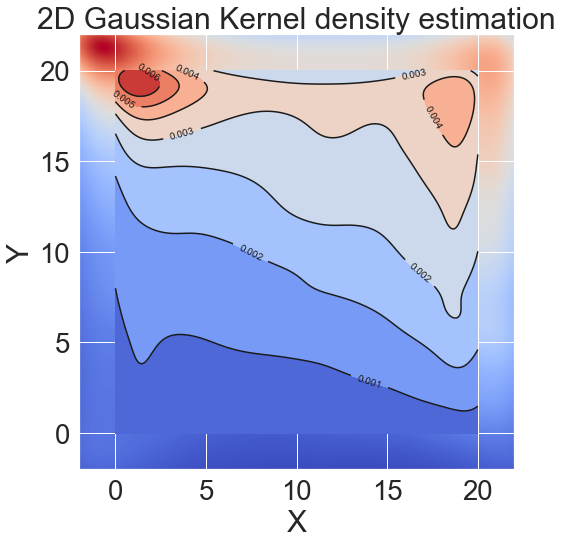

In [709]:
xx = X
yy = Y

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

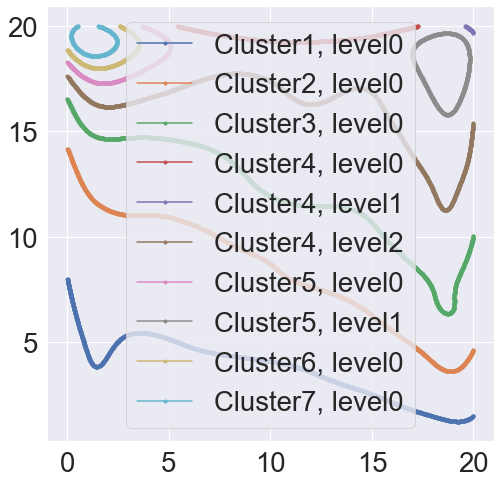

In [710]:
plt.figure(figsize=(8,8))
for j in range(len(cset.allsegs)):
    for ii, seg in enumerate(cset.allsegs[j]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=f'Cluster{j}, level{ii}')
plt.legend()

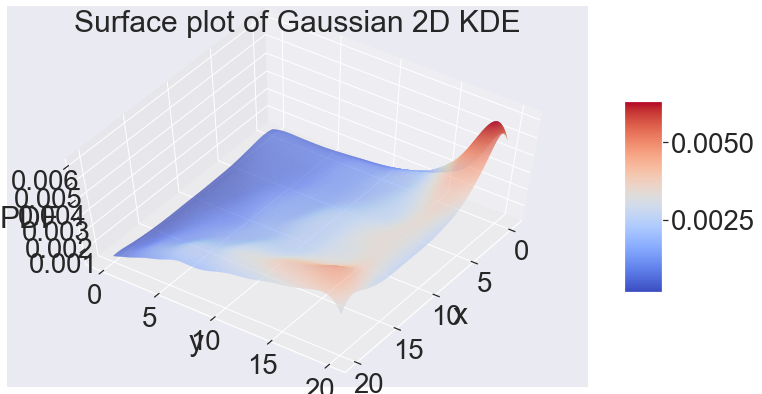

In [711]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)

In [716]:
np.mean(f),np.median(f),np.min(f),np.max(f)

(0.002035432147736126,
 0.0019205772709871547,
 0.00017271700978753205,
 0.00630911977225072)

Wall time: 1h 13min 27s


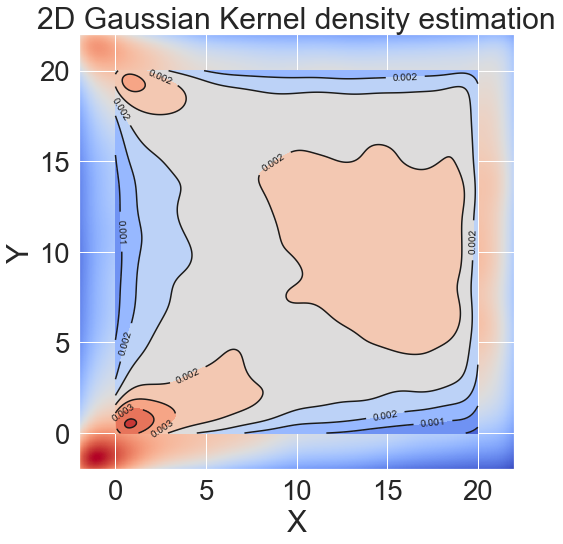

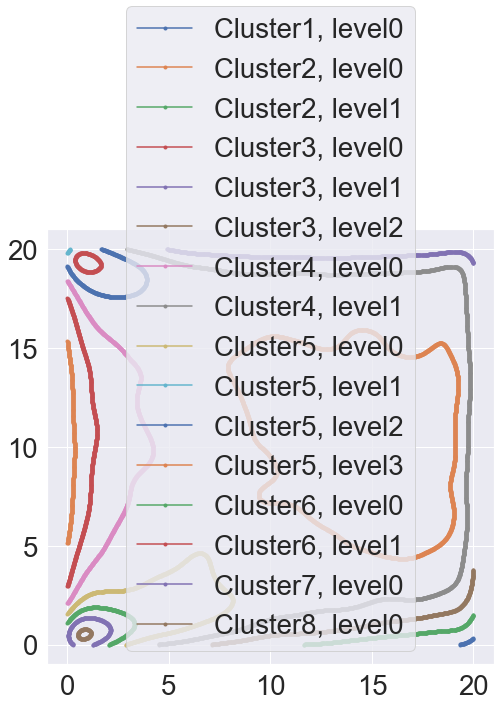

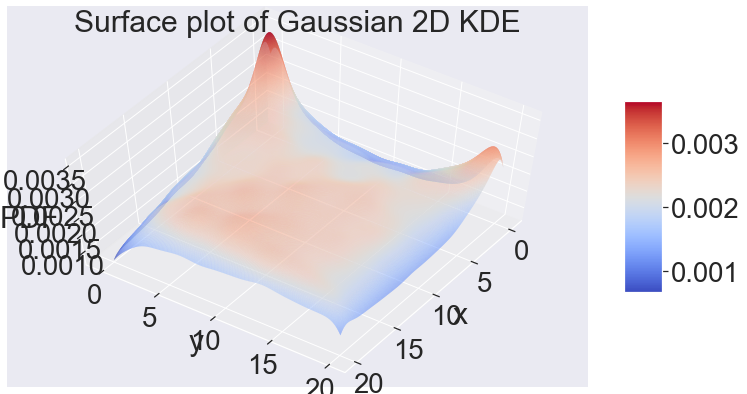

In [717]:
%%time
# https://towardsdatascience.com/simple-example-of-2d-density-plots-in-python-83b83b934f67
## Height chart for the deviation from flatness for the Homebrew Political Compass Values
# # this is the mask from one specific variable, we're just assuming that they have a similar pattern of nulls
# hmax = sns.kdeplot(pan_dataset_allr_values[x_axis][specific_mask],pan_dataset_allr_values[y_axis][specific_mask],
#                    cut=0, alpha=.25)
# hmax.collections[0].set_alpha(0)
    
import scipy.stats as st

x= pan_dataset_allr_values[x_axis].values
y= pan_dataset_allr_values[y_axis].values

positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, X.shape)

# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

xx = X
yy = Y

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

plt.figure(figsize=(8,8))
for j in range(len(cset.allsegs)):
    for ii, seg in enumerate(cset.allsegs[j]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=f'Cluster{j}, level{ii}')
plt.legend()

fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)

In [718]:
np.mean(f)

0.00220647214663576

In [563]:
# Random Graphs March 2019

#     base_var = re.sub("W\d+$","",var_list[0])
#     sorted_wavelist = sorted(wave_list)
#     filenames = [base+base_var+"W"+str(x)+"_kde"+".png" for x in sorted_wavelist]
#     print("building gif with: ", filenames)
#     # make gif if more than one file!
#     if len(filenames)>1:

#         images = []
#         for filename in filenames:
#             images.append(imageio.imread(filename))
#         imageio.mimsave(base+var_name+'.gif', images,'GIF',
#                         duration=[2.0 if x==np.min( sorted_wavelist ) else 0.6 for x in sorted_wavelist])  

0

In [ ]:
# like_var = 'ptvBrexitPartyW16'
# like_var = 'ptvConW16'
# like_var = 'ptvLDW16'

# mean_like_Corbyn = BES_Panel[[like_var]]\
# .replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)
# # mean_like_Corbyn 
# (pan_dataset_allr_values[x_axis].astype('float')*mean_like_Corbyn).sum()/mean_like_Corbyn.sum(),\
#     (pan_dataset_allr_values[y_axis].astype('float')*mean_like_Corbyn).sum()/mean_like_Corbyn.sum()




# result = np.where( df[like_var].values.reshape((output_granularity,output_granularity)) == df.max().loc[like_var] )
# listOfCoordinates= list(zip(result[0], result[1]))
# listOfCoordinates

# df["ptvConW16"].values.reshape((output_granularity,output_granularity))[999, 999]

In [18]:
like_var = "ptvLab"

BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
    BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
        .apply(lambda x: x.cat.reorder_categories(['Very unlikely','1', '2', '3', '4', '5', '6', '7', '8', '9',
           'Very likely', "Don't know" ]))

In [129]:
pan_dataset_allr_values

,Economic: Left(0) <-> Right(200){uniform},Social: Liberalism(0) <-> Conservatism(200){uniform},Economic: Left <-> Right{gaussian-ish},Social: Liberalism <-> Conservatism{gaussian-ish},id,lr_uniform,al_uniform
0,10,168,-1.708655,1.032113,1,2,42
1,196,58,2.057812,-0.576999,2,48,14
2,66,112,-0.421851,0.183770,3,16,28
3,158,168,0.786886,1.018656,4,39,41
4,116,54,0.199071,-0.646766,5,28,13
...,...,...,...,...,...,...,...
92582,68,82,-0.393581,-0.231666,94883,16,20
92583,138,63,0.481213,-0.512008,94884,34,15
92584,13,173,-1.562710,1.129011,94885,3,43
92585,145,142,0.582407,0.590676,94886,36,35


In [86]:
## heat map by PC coords?

# recreate granularity at whatever level

granularity = 50
pan_dataset_allr_values["lr_uniform"] = pd.qcut( pan_dataset_allr_values[pan_dataset_allr_values.columns[2]], q=granularity, labels=range(0,granularity))
pan_dataset_allr_values["al_uniform"] = pd.qcut( pan_dataset_allr_values[pan_dataset_allr_values.columns[3]], q=granularity, labels=range(0,granularity))


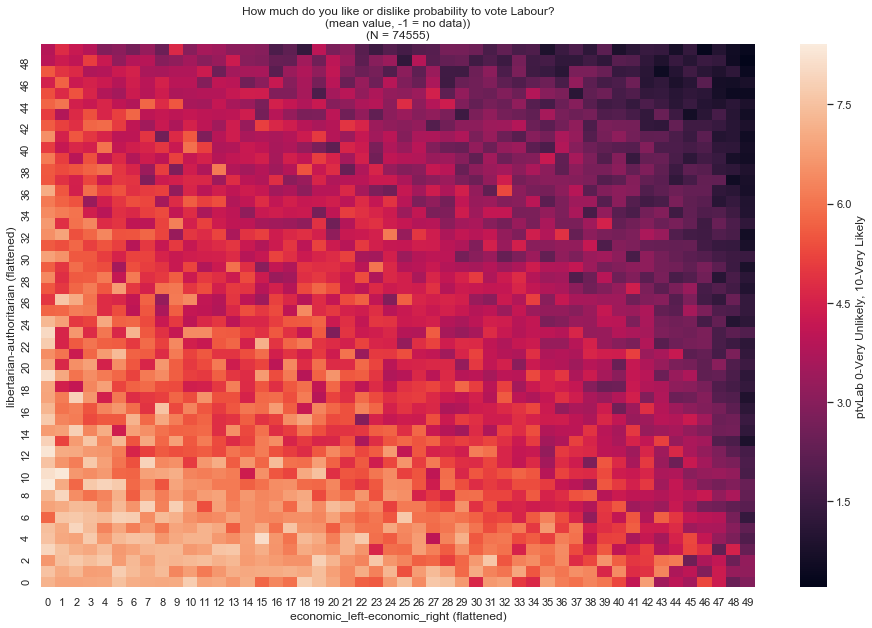

In [87]:
treatment = "turnout_heatmap"
output_subfolder = create_subdir(BES_output_folder, treatment)


(like_var, like_name) = ("likeMay", "Theresa May")
(like_var, like_name) = ("likeBNP", "British National Party")
(like_var, like_name) = ("likeBennett", "Natalie Bennett")
(like_var, like_name) = ("likeBlair", "Tony Blair")
(like_var, like_name) = ("likeBoris", "Boris Johnson")
(like_var, like_name) = ("likeCameron", "David Cameron")
(like_var, like_name) = ("likeClegg", "Nick Clegg")
(like_var, like_name) = ("likeCon", "The Conservative Party")
(like_var, like_name) = ("likeDavis", "David Davis")
(like_var, like_name) = ("likeFarage", "Nigel Farage")
(like_var, like_name) = ("likeFarron", "Tim Farron")
(like_var, like_name) = ("likeJarvis", "Dan Jarvis")
(like_var, like_name) = ("likeLD", "The Liberal Democrats")
(like_var, like_name) = ("likeLab", "The Labour Party")
(like_var, like_name) = ("likeLucas", "Caroline Lucas")
(like_var, like_name) = ("likeMcDonnell", "John McDonnell")
(like_var, like_name) = ("likeMiliband", "Ed Miliband")
(like_var, like_name) = ("likeNuttall", "Paul Nuttall")
(like_var, like_name) = ("likeOsborne", "George Osborne")
# (like_var, like_name) = ("likePC", "Plaid Cymru")
(like_var, like_name) = ("likeRudd", "Amber Rudd")
(like_var, like_name) = ("likeSEvans", "Suzanne Evans")
(like_var, like_name) = ("likeSNP", "The Scottish Nationalist Party")
# (like_var, like_name) = ("likeSalmond", "Alex Salmond")
(like_var, like_name) = ("likeSturgeon", "Nicola Sturgeon")
(like_var, like_name) = ("likeUKIP", "The UK Independence Party")
(like_var, like_name) = ("likeWatson", "Tom Watson")
(like_var, like_name) = ("likeWood", "Leanne Wood")
#
(like_var, like_name) = ("euPriorityBalance", "euPriorityBalance")
(like_var, like_name) = ("immigSelf", "immigSelf")
(like_var, like_name) = ("likeCorbyn", "Jeremy Corbyn")
(like_var, like_name) = ("likeMay", "Theresa May")
(like_var, like_name) = ("profile_turnout_2015", "2015GE turnout")
# (like_var, like_name) = ("profile_turnout_2017", "2017GE turnout")
(like_var, like_name) = ("profile_eurefturnout", "euref turnout")
# (like_var, like_name) = ("euroTurnoutRetroW2", "euro elections turnout")
# (like_var, like_name) = ("localTurnoutRetroW16", "local elections turnout")
(like_var, like_name) = ("profile_eurefvote", "euref vote")
(like_var, like_name) = ("profile_gross_personal", "profile_gross_personal")
(like_var, like_name) = ("ptvLab", "probability to vote Labour")



scale_text = ' 0-Strongly dislike, 10-Strongly like'
scale_text = ' Low=Not Turning Out, High=Turning Out'
scale_text = ' 0-Very Unlikely, 10-Very Likely'

# (like_var, like_name) = ("profile_turnout_2017", "2017GE turnout")
# (like_var, like_name) = ("likeFarage", "Nigel Farage")
# (like_var, like_name) = ("profile_eurefvote", "Brexit")

y_axis = pan_dataset_allr_values.columns[1]
y_axis = "al_uniform"

x_axis = pan_dataset_allr_values.columns[0]
x_axis = "lr_uniform"


mean_like_Corbyn = BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
.replace("Don't know",np.nan).replace("There wasn't a local election in my area",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)
mask = mean_like_Corbyn.notnull()

likeCorbyn_heatmap = pd.crosstab(index = pan_dataset_allr_values[y_axis][mask],
            columns = pan_dataset_allr_values[x_axis][mask],
            values = mean_like_Corbyn[mask],
            aggfunc = np.mean)

plt.figure(figsize = (16,10))
ax = sns.heatmap(data = likeCorbyn_heatmap.replace(np.nan,-1),
            cbar_kws={'label': like_var+ scale_text})
ax.invert_yaxis()
# plt.colorbar(points);
plt.xlim([0,granularity])
plt.ylim([0,granularity])
plt.ylabel("libertarian-authoritarian (flattened)");
plt.xlabel("economic_left-economic_right (flattened)");
plt.title("How much do you like or dislike "+like_name+"?\n(mean value, -1 = no data))\n(N = "+str(mask.sum())+")")
plt.savefig(BES_output_folder + treatment + os.sep + like_var +"_by_allr_heatmap" + ".png")

# mean_like_Corbyn = BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
# .replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)
# mask = mean_like_Corbyn.notnull()

# x_axis = "xt_std_al"
# y_axis = "xt_std_lr"

# corbynLike_by_values = pan_dataset_allr_values[[y_axis,x_axis]][mask]
# corbynLike_by_values[like_var] = mean_like_Corbyn[mask]

# plt.figure(figsize = (16,10))
# points = plt.scatter(data = corbynLike_by_values, x = x_axis, y = y_axis, c = like_var,
#                      cmap="brg", alpha=.5, s=10)
# cbar = plt.colorbar(points);
# cbar.set_label(like_var+' 0-Strongly dislike, 10-Strongly like', rotation=270)
# plt.xlabel("libertarian-authoritarian (normalised)");
# plt.ylabel("economic_right-economic_left (normalised)");
# plt.title("How much do you like or dislike "+like_name+"?\n(N = "+str(mask.sum())+")")
# # plt.savefig(BES_output_folder + "likeCorbyn_byvalues_overtime" + os.sep + like_name+"_by_allr_scatter" + ".png") 

In [88]:
# x,y = np.mgrid[0:size:granularity*1j,
#          0:size:granularity*1j]

z.max()

nan

Wall time: 2.47 s


Text(0.5, 0, 'economic_left-economic_right (flattened)')

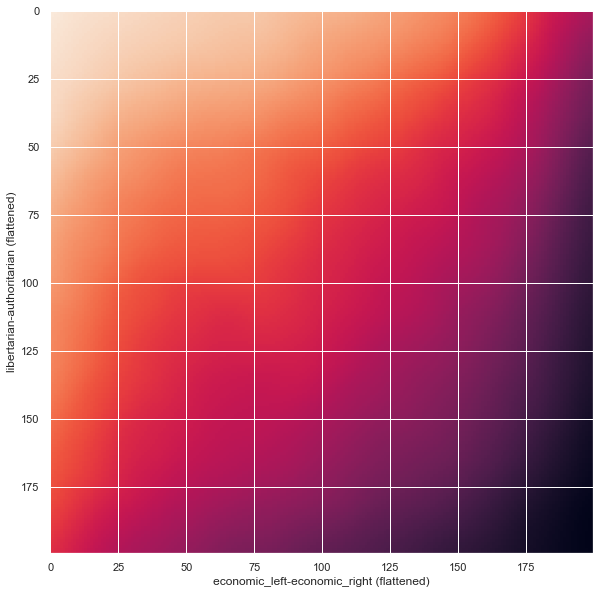

In [131]:
%%time
# points = pan_dataset_allr_values[[x_axis,y_axis]][mask].values
# x = pan_dataset_allr_values[x_axis][mask].values
# y = pan_dataset_allr_values[y_axis][mask].values

size = likeCorbyn_heatmap.columns.max()

x,y = np.mgrid[0:size:granularity*1j,
         0:size:granularity*1j
         ]
# x = x.flatten()
# y = y.flatten()
z =  likeCorbyn_heatmap.values#.flatten()

interp=interpolate.Rbf(x,y,z,function='linear',smooth=100.0)

# xnew, ynew = np.mgrid[-1:1:70j, -1:1:70j]
# xnew, ynew = np.mgrid[0:200:201j, 0:200:201j]
# xnew, ynew = np.mgrid[0:granularity, 0:granularity]
# tck = interpolate.bisplrep(x, y, z, s=0)
# znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

# output_granularity=200
grid=np.mgrid[0:size:1j*output_granularity,
               0:size:1j*output_granularity]
result=interp(grid[0,:,:],grid[1,:,:]);
plt.figure(figsize=(12,10));
plt.imshow(result,interpolation = 'none'); #Apparently nice smooth linear-ish interpolation
plt.ylabel("libertarian-authoritarian (flattened)");
plt.xlabel("economic_left-economic_right (flattened)");

In [117]:
likeCorbyn_heatmap.min().min(),likeCorbyn_heatmap.max().max(),

(0.20135023706452276, 8.41843081161263)

In [114]:
result.max()

7.5174846123715495

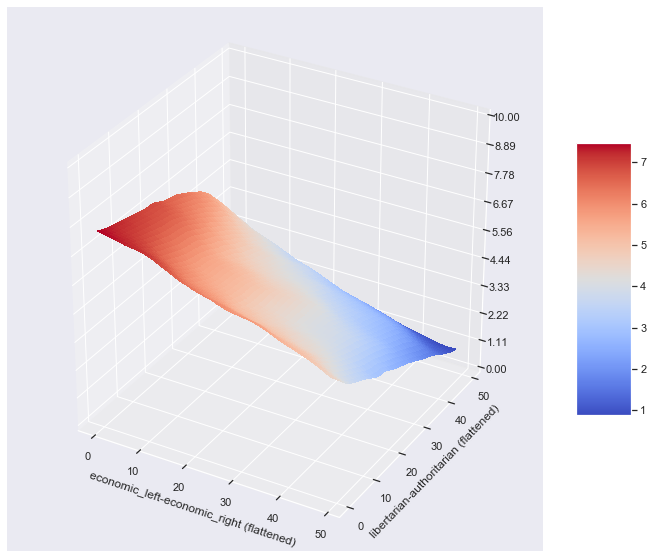

In [118]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter

X,Y = grid
Z = result.reshape(X.shape)
# Plot the surface.
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(0, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
plt.ylabel("libertarian-authoritarian (flattened)");
plt.xlabel("economic_left-economic_right (flattened)");

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [120]:
# import numpy as np
# from scipy import interpolate
# import matplotlib.pyplot as plt

# #create some objects to store data
# x=np.empty((2,2))
# y=np.empty((2,2))
# f_shape=(100,100,100)

# #generate coordinates
# x[0, :] =  0
# x[-1, :] = f_shape[0]
# y[:, 0] = 0
# y[:, -1] = f_shape[1]

# #--------constant height----------
# z=np.full((2,2),50)

# #create interpolation function and interpolate across grid
# interp=interpolate.Rbf(x,y,z,function='linear')
# grid=np.mgrid[0:f_shape[0],0:f_shape[1]]
# result=interp(grid[0,:,:],grid[1,:,:])

# plt.imshow(result) #incorrect curved surface from constant height!!!

# #--------random heights-----------
# z=np.random.uniform(25,75,(2,2))

# #create interpolation function and interpolate across grid
# interp=interpolate.Rbf(x,y,z,function='linear')
# grid=np.mgrid[0:f_shape[0],0:f_shape[1]]
# result=interp(grid[0,:,:],grid[1,:,:])

# plt.imshow(result) #Apparently nice smooth linear-ish interpolation

In [121]:
# from scipy import interpolate
# # likeCorbyn_heatmap = pd.crosstab(index = pan_dataset_allr_values[y_axis][mask],
# #             columns = pan_dataset_allr_values[x_axis][mask],
# #             values = mean_like_Corbyn[mask],
# #             aggfunc = np.mean)

# f = interpolate.interp2d(pan_dataset_allr_values[x_axis][mask],
#                          pan_dataset_allr_values[y_axis][mask],
#                          mean_like_Corbyn[mask], kind='cubic')

In [122]:
# # def func(x, y):
# #     return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

# granularity = 10

# grid_x, grid_y = np.mgrid[0:200:201j, 0:200:201j]
# grid_x, grid_y = np.mgrid[0:granularity, 0:granularity]
# # points = np.random.rand(1000, 2)
# # values = func(points[:,0], points[:,1])

# points = pan_dataset_allr_values[[x_axis,y_axis]][mask].values
# values = mean_like_Corbyn[mask].values
# # grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]


# from scipy.interpolate import griddata
# grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
# grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
# grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

# import matplotlib.pyplot as plt
# plt.subplot(221)
# # plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
# # plt.plot(points[:,0], points[:,1], 'k.', ms=1)
# plt.title('Original')
# plt.subplot(222)
# plt.imshow(grid_z0, extent=(0,granularity,0,granularity), origin='lower')
# plt.title('Nearest')
# plt.subplot(223)
# plt.imshow(grid_z1, extent=(0,granularity,0,granularity), origin='lower')
# plt.title('Linear')
# plt.subplot(224)
# plt.imshow(grid_z2, extent=(0,granularity,0,granularity), origin='lower')
# plt.title('Cubic')
# plt.gcf().set_size_inches(6, 6)
# plt.show()

In [123]:
# points = pan_dataset_allr_values[[x_axis,y_axis]][mask].values
# x = pan_dataset_allr_values[x_axis][mask].values
# y = pan_dataset_allr_values[y_axis][mask].values
# z = mean_like_Corbyn[mask].values



# # xnew, ynew = np.mgrid[-1:1:70j, -1:1:70j]
# # xnew, ynew = np.mgrid[0:200:201j, 0:200:201j]
# xnew, ynew = np.mgrid[0:granularity, 0:granularity]
# tck = interpolate.bisplrep(x, y, z, s=0)
# znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

# plt.figure()
# plt.pcolor(xnew, ynew, znew)
# plt.colorbar()
# plt.title("Interpolated function.")
# plt.show()

In [ ]:
# plt.imshow(znew, extent=(xnew.min(), xnew.max(), ynew.min(), ynew.max()),
#            interpolation='nearest', cmap=cm.gist_rainbow)

In [124]:
# xnew = np.arange(pan_dataset_allr_values[x_axis][mask].min(),
#                  pan_dataset_allr_values[x_axis][mask].max(), 1e-2)
# ynew = np.arange(pan_dataset_allr_values[y_axis][mask].min(),
#                  pan_dataset_allr_values[y_axis][mask].max(), 1e-2)
# # ynew = np.arange(-5.01, 5.01, 1e-2)
# znew = f(xnew, ynew)
# plt.plot(ynew, znew[0,:], 'b-')
# plt.imshow(znew, extent=(xnew.min(), xnew.max(), ynew.min(), ynew.max()),
# #            interpolation='nearest', cmap=cm.gist_rainbow)

# # plt.imshow(znew,interpolation='nearest')


# plt.show()


In [56]:
BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
.replace("Don't know",np.nan)["euroTurnoutRetroW16"].cat.categories

Index(['No, I did not vote', 'Yes, I voted', 'Don't know'], dtype='object')

In [25]:
mean_like_Corbyn.isnull().sum()

64586

In [109]:
party_list = list( BES_Panel[ ['profile_past_vote_2005','profile_past_vote_2010','profile_past_vote_2015' ] ].stack().unique() )
party_list.append('I would not vote')
replace_dict = {'Labour Party':"LAB", 
 'United Kingdom Independence Party (UKIP)':"UKIP",
 'Labour':"LAB",
 'Conservative Party':"CON",
 'Conservative':"CON",
 'Liberal Democrats':"LD",
 'Did not vote':"DNV",
 'Scottish National Party':"SNP",
 'Scottish National Party (SNP)':"SNP",
 'British National Party (BNP)':"BNP",
 'Green Party':"GP",
 'Liberal Democrat':"LD",
 "Don't know":"DK",
 'Some other party':"OTH",
 'Veritas':"VER",
 'Plaid Cymru':"PC",
 'Other':"OTH",
 'Respect':"RES",
 'I would not vote':"DNV",
 "Brexit Party":"BXP",
 'Change UK- The Independent Group':"CUK",
 "Leave the EU":"LEAVE",
 "Stay/remain in the EU":"REMAIN",}



colourmap = {'LAB':'red', 'UKIP':'purple', 'CON':'blue', 'SNP':'yellow', 'BNP':'black', 'LD':'orange', 'DNV':'dimgray', 'DK':'lightgray', 'OTH':'brown', 'GP':'green',
       'VER':'pink', 'PC':'olive', 'RES':'peru', "BXP":'cyan',"CUK":'black','LEAVE':'blue','REMAIN':'yellow',}
base_order = ['LAB','CON','DK','UKIP','LD','SNP','DNV','GP','PC','BNP','OTH','RES','VER']
lr_order   = ['GP','PC','LAB','SNP','DK','OTH','DNV','LD','CON','UKIP','BNP','RES','VER']
cmap = ['red','purple','blue','yellow','black','orange','grey','cyan','brown','green','pink','olive','peru']

In [110]:
sub_treatment = "quick_value_breakdown"
output_subfolder = create_subdir(BES_output_folder, sub_treatment) 

In [5]:
BES_Panel = pd.read_msgpack(BES_data_folder+os.sep+"W16_comb"+os.sep+"BES2019_W16_Panel_v0.3.msgpack")

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\IPython\core\interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
search(BES_Panel,"al_Scale")

al_scaleW1W2W3W4W5    37717
al_scaleW6            27200
al_scaleW7W8W9        35873
al_scaleW10W11W12     30088
al_scaleW13           27253
al_scaleW14W15        31629
al_scaleW16           32671
dtype: int64

In [7]:
search(BES_Panel,"euroElection")

euroElectionVoteW1             30335
euroElectionVoteW2             22174
euroElectionVoteW16            25837
euroElectionVoteNonVoterW16    12122
dtype: int64

In [22]:
euro_election_al = BES_Panel["al_scaleW16"].cat.codes.replace(-1,np.nan).groupby(BES_Panel["euroElectionVoteW16"]).mean()
euro_election_lr = BES_Panel["lr_scaleW16"].cat.codes.replace(-1,np.nan).groupby(BES_Panel["euroElectionVoteW16"]).mean()

In [40]:
df

,euroElection2019VI,Economic Left-Right,Social Liberal-Conservative,size
0,Conservative,8.729993,14.004545,30
1,Labour,6.890320,10.855742,30
2,Liberal Democrat,6.357935,9.897686,30
3,Scottish National Party (SNP),6.071183,9.944099,30
4,Plaid Cymru,5.309963,9.648438,30
5,United Kingdom Independence Party (UKIP),6.997275,14.837017,30
6,Green Party,6.093074,9.153210,30
7,Other,7.159292,12.418708,30
8,Change UK- The Independent Group,6.759051,11.809706,30
9,Brexit Party,7.218283,14.951400,30


Text(0.5, 1.0, 'Mean Values of Euro Election 2019 Voters by Party')

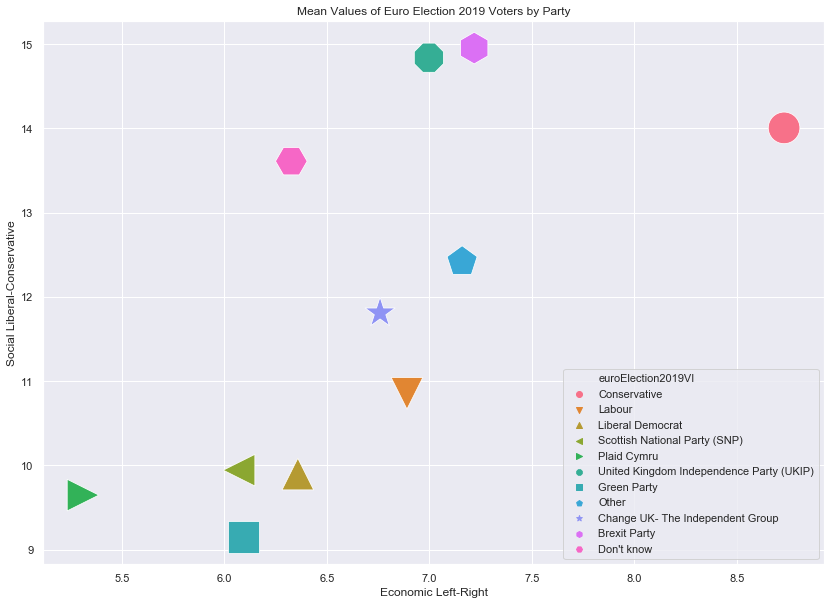

In [69]:
euro_election_al = BES_Panel["al_scaleW16"].cat.codes.replace(-1,np.nan).groupby(BES_Panel["euroElectionVoteW16"]).mean()
euro_election_lr = BES_Panel["lr_scaleW16"].cat.codes.replace(-1,np.nan).groupby(BES_Panel["euroElectionVoteW16"]).mean()

df = pd.concat([euro_election_lr,euro_election_al],axis=1).reset_index()
cat_name ="euroElection2019VI"
lr_scale_name = "Economic Left-Right"
al_scale_name = "Social Liberal-Conservative"
df.columns = [cat_name,lr_scale_name,al_scale_name]
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(14,10))
sns.scatterplot(data=df,x=lr_scale_name,y=al_scale_name,hue=cat_name, s=1000 ,style=cat_name, markers=filled_markers);
#                 size="size");
plt.title("Mean Values of Euro Election 2019 Voters by Party");

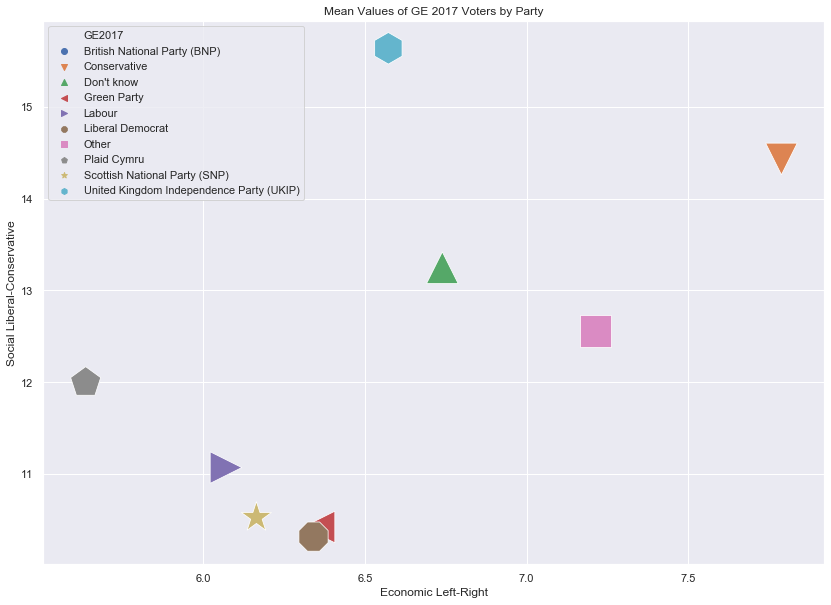

In [83]:
cat_variable = "profile_past_vote_2017"

best_al_scale_variable = search(BES_Panel,"al_scale",mask=BES_Panel[cat_variable].notnull()).sort_values(ascending=False).index[0]
best_lr_scale_variable = search(BES_Panel,"lr_scale",mask=BES_Panel[cat_variable].notnull()).sort_values(ascending=False).index[0]

euro_election_al = BES_Panel[best_al_scale_variable].cat.codes.replace(-1,np.nan).groupby(BES_Panel[cat_variable]).mean()
euro_election_lr = BES_Panel[best_lr_scale_variable].cat.codes.replace(-1,np.nan).groupby(BES_Panel[cat_variable]).mean()

df = pd.concat([euro_election_lr,euro_election_al],axis=1).reset_index()
cat_name ="GE2017"
lr_scale_name = "Economic Left-Right"
al_scale_name = "Social Liberal-Conservative"
df.columns = [cat_name,lr_scale_name,al_scale_name]

df = df.drop(0)

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(14,10))
sns.scatterplot(data=df,x=lr_scale_name,y=al_scale_name,hue=cat_name, s=1000 ,style=cat_name, markers=filled_markers);
#                 size="size");
plt.title("Mean Values of GE 2017 Voters by Party");

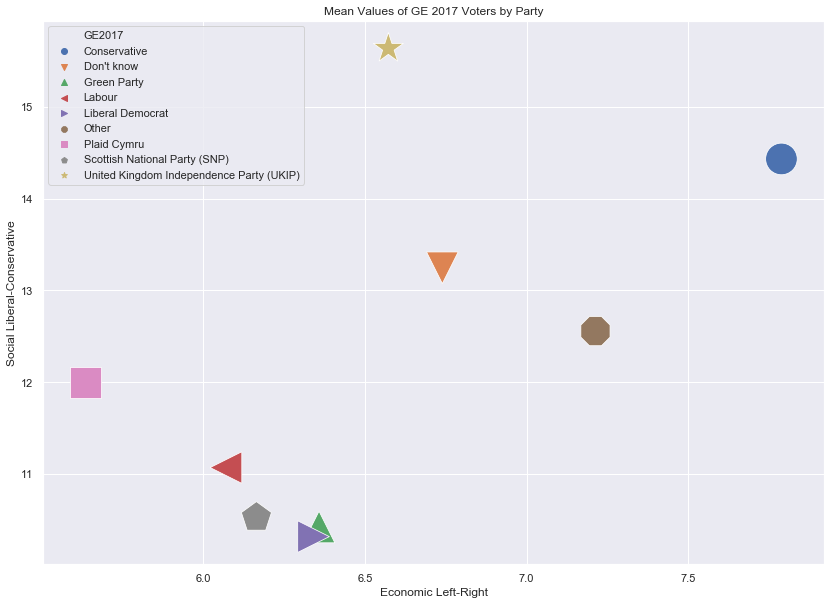

In [100]:
cat_variable = "profile_past_vote_2017"
cats = BES_Panel[cat_variable]
cats = cats.apply(lambda x: x if x not in cat_sample_sizes[cat_sample_sizes<100].index else np.nan).astype('category')

best_al_scale_variable = search(BES_Panel,"al_scale",mask=cats.notnull()).sort_values(ascending=False).index[0]
best_lr_scale_variable = search(BES_Panel,"lr_scale",mask=cats.notnull()).sort_values(ascending=False).index[0]

euro_election_al = BES_Panel[best_al_scale_variable].cat.codes.replace(-1,np.nan).groupby(cats).mean()
euro_election_lr = BES_Panel[best_lr_scale_variable].cat.codes.replace(-1,np.nan).groupby(cats).mean()

df = pd.concat([euro_election_lr,euro_election_al],axis=1).reset_index()
cat_name ="GE2017"
lr_scale_name = "Economic Left-Right"
al_scale_name = "Social Liberal-Conservative"
df.columns = [cat_name,lr_scale_name,al_scale_name]

# df = df.drop(0)

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(14,10))
sns.scatterplot(data=df,x=lr_scale_name,y=al_scale_name,hue=cat_name, s=1000 ,style=cat_name, markers=filled_markers);
#                 size="size");
plt.title("Mean Values of GE 2017 Voters by Party");

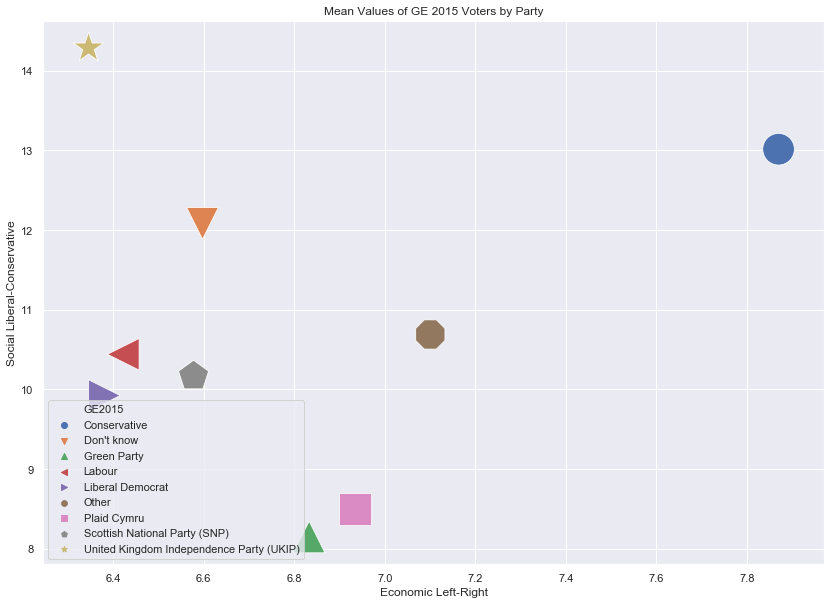

In [102]:
cat_variable = "profile_past_vote_2015"
cats = BES_Panel[cat_variable]
cats = cats.apply(lambda x: x if x not in cat_sample_sizes[cat_sample_sizes<100].index else np.nan).astype('category')

best_al_scale_variable = search(BES_Panel,"al_scale",mask=cats.notnull()).sort_values(ascending=False).index[0]
best_lr_scale_variable = search(BES_Panel,"lr_scale",mask=cats.notnull()).sort_values(ascending=False).index[0]

euro_election_al = BES_Panel[best_al_scale_variable].cat.codes.replace(-1,np.nan).groupby(cats).mean()
euro_election_lr = BES_Panel[best_lr_scale_variable].cat.codes.replace(-1,np.nan).groupby(cats).mean()

df = pd.concat([euro_election_lr,euro_election_al],axis=1).reset_index()
cat_name ="GE2015"
lr_scale_name = "Economic Left-Right"
al_scale_name = "Social Liberal-Conservative"
df.columns = [cat_name,lr_scale_name,al_scale_name]

# df = df.drop(0)

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(14,10))
sns.scatterplot(data=df,x=lr_scale_name,y=al_scale_name,hue=cat_name, s=1000 ,style=cat_name, markers=filled_markers);
#                 size="size");
plt.title("Mean Values of GE 2015 Voters by Party");

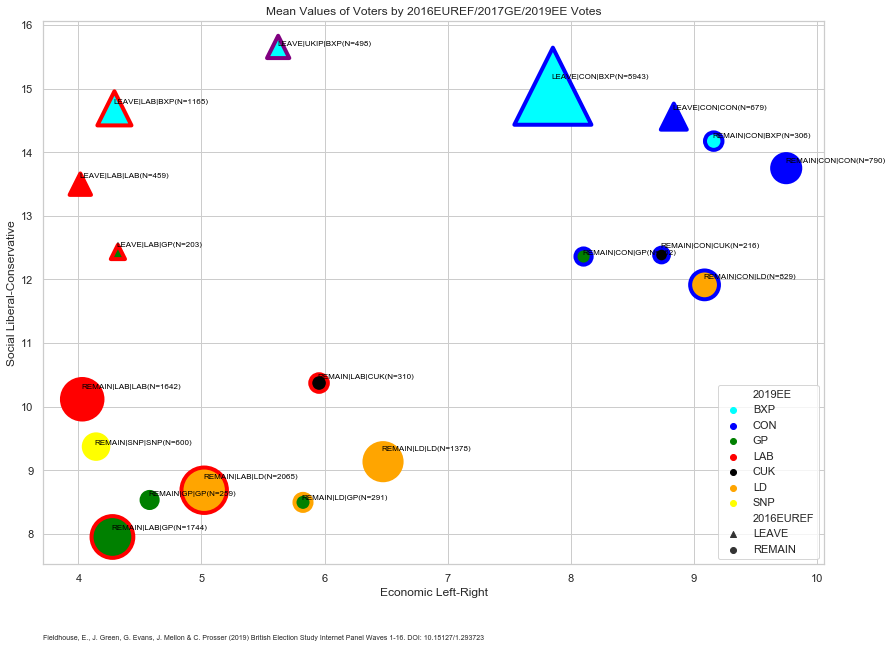

In [159]:
# %%time
# cat_variable = "profile_past_vote_2015"


mask = BES_Panel["profile_eurefvote"].notnull() & BES_Panel["profile_past_vote_2017"].notnull() & BES_Panel["euroElectionVoteW16"].notnull()
cats = BES_Panel["profile_eurefvote"].map(replace_dict).astype(str)+"|"+BES_Panel["profile_past_vote_2017"].map(replace_dict).astype(str)+"|"+BES_Panel["euroElectionVoteW16"].map(replace_dict).astype(str)
cats[~mask] = np.nan
cats = cats.astype('category')

# cats = BES_Panel[cat_variable]
cat_sample_sizes = cats.value_counts()

cats.cat.remove_categories(cat_sample_sizes[cat_sample_sizes<200].index,inplace=True)

cats = cats.apply(lambda x: x+"(N="+str(cat_sample_sizes.loc[x])+")")

# cats = cats.apply(lambda x: x if x in cat_sample_sizes[cat_sample_sizes>500].index else np.nan).astype('category')

best_al_scale_variable = search(BES_Panel,"al_scale",mask=cats.notnull()).sort_values(ascending=False).index[0]
best_lr_scale_variable = search(BES_Panel,"lr_scale",mask=cats.notnull()).sort_values(ascending=False).index[0]

best_weight_variable = search(BES_Panel,"wt_",mask=BES_Panel[best_al_scale_variable].cat.codes.replace(-1,np.nan).notnull()).sort_values(ascending=False).index[0]
euro_election_al = pd.crosstab(index   = cats,
                       columns = BES_Panel[best_al_scale_variable].cat.codes.replace(-1,np.nan),
                       values  = BES_Panel[ best_weight_variable ],
                       aggfunc = sum,
                       normalize='index')
euro_election_al = euro_election_al.apply(lambda x: sum(x*euro_election_al.columns),axis=1)

euro_election_lr = pd.crosstab(index   = cats,
                       columns = BES_Panel[best_lr_scale_variable].cat.codes.replace(-1,np.nan),
                       values  = BES_Panel[ best_weight_variable ],
                       aggfunc = sum,
                       normalize='index')
euro_election_lr = euro_election_lr.apply(lambda x: sum(x*euro_election_lr.columns),axis=1)

# euro_election_al = BES_Panel[best_al_scale_variable].cat.codes.replace(-1,np.nan).groupby(cats).mean()
# euro_election_lr = BES_Panel[best_lr_scale_variable].cat.codes.replace(-1,np.nan).groupby(cats).mean()

df = pd.concat([euro_election_lr,euro_election_al],axis=1).reset_index()
cat_name ="2016EUREF|2017GE|2019EE"
lr_scale_name = "Economic Left-Right"
al_scale_name = "Social Liberal-Conservative"
df.columns = [cat_name,lr_scale_name,al_scale_name]

df["2016EUREF"] = df[cat_name].apply(lambda x: x.split("|")[0])
df["2017GE"] = df[cat_name].apply(lambda x: x.split("|")[1])
df["2019EE"] = df[cat_name].apply(lambda x: x.split("|")[2].split("(")[0])
df["sample_size"] = df[cat_name].apply(lambda x: int(x.split("|")[2].split("=")[1].split(")")[0]) )

# df = df.drop(0)
from itertools import cycle
filled_markers = cycle(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'])
plt.figure(figsize=(14,10))
sct = sns.scatterplot(data=df,x=lr_scale_name,y=al_scale_name, 
                hue="2019EE" ,palette = colourmap,style="2016EUREF", markers = ['^','o'],
                linewidth=4,edgecolor = df["2017GE"].map(colourmap), s = df["sample_size"])
#                 label=df[cat_name])
# s=1000,                
                
#                 style=cat_name,
#                 markers=filled_markers);
#                 size="size");
plt.title("Mean Values of Voters by 2016EUREF/2017GE/2019EE Votes");

for line in range(0,df.shape[0]):
     sct.text(df[lr_scale_name][line]-0.01, df[al_scale_name][line]+np.random.rand()*.2, 
     df[cat_name][line], horizontalalignment='left', 
     size=8, color='black')#, weight='semibold')

# lgnd = plt.legend(title='Smoker', loc='upper left')
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# plt.show()
# plt.gca().legend()
sct.annotate(dataset_citation, (0,0), (0, -70),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) ; 

In [82]:
## Paula Surridge's chart is GE VI and England only

In [94]:
mask = BES_Panel["profile_eurefvote"].notnull() & BES_Panel["profile_past_vote_2017"].notnull() & BES_Panel["euroElectionVoteW16"].notnull()
mask.sum()

23423

In [158]:
sns.set_style("whitegrid")


generalElectionVoteW1              30342
generalElectionVoteW2              30228
generalElectionVoteW3              28111
generalElectionVoteW4              31440
generalElectionVoteUnsqueezeW4     20839
generalElectionVoteSqueezeW4        9370
generalElectionVoteW5              30377
generalElectionVotePostW5           3237
generalElectionVoteUnsqueezeW5     19417
generalElectionVoteSqueezeW5        6793
generalElectionVoteW6              27821
generalElectionVoteW7              30895
generalElectionVoteW8              33502
generalElectionVoteW9              30036
generalElectionVoteW10             30237
generalElectionVoteW11             30956
generalElectionVoteUnsqueezeW11    20488
generalElectionVoteSqueezeW11       9330
generalElectionVoteW12             34394
generalElectionVotePostW12          4335
generalElectionVoteUnsqueezeW12    21316
generalElectionVoteSqueezeW12       7389
generalElectionVoteW13             28297
generalElectionVoteW14             31063
generalElectionV

wt_new_W16 al_scaleW16 lr_scaleW16


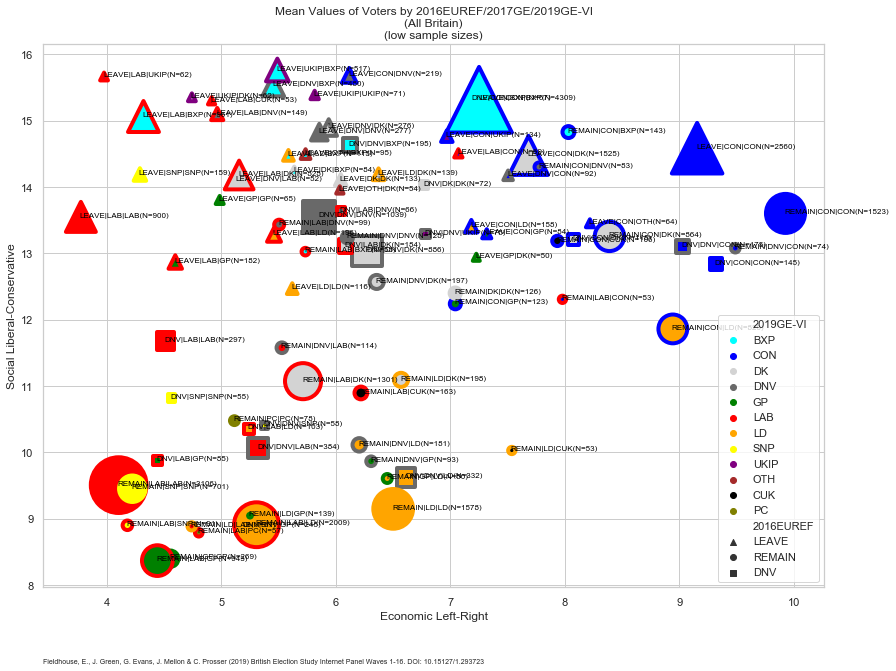

In [253]:
# %%time
# cat_variable = "profile_past_vote_2015"

title = "Mean Values of Voters by 2016EUREF/2017GE/2019GE-VI\n(All Britain)\n(low sample sizes)"
fig = plt.figure(figsize=(14,10))

# restriction = BES_Panel["country"]=="England"
restriction = None
sample_size_boost=1
min_sample_size = 50

if restriction is None:
    BES = BES_Panel
else:
    BES = BES_Panel[restriction]
# BES = BES_Panel

var_list = ["profile_eurefvote","profile_past_vote_2017","generalElectionVoteW16"]
exposed_final_vote_name = "2019GE-VI"


mask = BES[var_list].notnull().all(axis=1)
cats = BES[var_list].apply(lambda x: x.map(replace_dict)).astype(str).apply(lambda x: "|".join(x),axis=1)
# mask = BES_Panel["profile_eurefvote"].notnull() & BES_Panel["profile_past_vote_2017"].notnull() & BES_Panel["euroElectionVoteW16"].notnull()
# cats = BES_Panel["profile_eurefvote"].map(replace_dict).astype(str)+"|"+BES_Panel["profile_past_vote_2017"].map(replace_dict).astype(str)+"|"+BES_Panel["euroElectionVoteW16"].map(replace_dict).astype(str)
cats[~mask] = np.nan
cats = cats.astype('category')

# cats = BES_Panel[cat_variable]
cat_sample_sizes = cats.value_counts()

cats.cat.remove_categories(cat_sample_sizes[cat_sample_sizes<min_sample_size].index,inplace=True)

cats = cats.apply(lambda x: x+"(N="+str(cat_sample_sizes.loc[x])+")")

# cats = cats.apply(lambda x: x if x in cat_sample_sizes[cat_sample_sizes>500].index else np.nan).astype('category')

best_al_scale_variable = search(BES,"al_scale",mask=cats.notnull()).sort_values(ascending=False).index[0]
best_lr_scale_variable = search(BES,"lr_scale",mask=cats.notnull()).sort_values(ascending=False).index[0]

best_weight_variable = search(BES,"wt_",mask=BES[best_al_scale_variable].cat.codes.replace(-1,np.nan).notnull()).sort_values(ascending=False).index[0]
print(best_weight_variable,best_al_scale_variable,best_lr_scale_variable)
euro_election_al = pd.crosstab(index   = cats,
                       columns = BES[best_al_scale_variable].cat.codes.replace(-1,np.nan),
                       values  = BES[ best_weight_variable ],
                       aggfunc = sum,
                       normalize='index')
euro_election_al = euro_election_al.apply(lambda x: sum(x*euro_election_al.columns),axis=1)

euro_election_lr = pd.crosstab(index   = cats,
                       columns = BES[best_lr_scale_variable].cat.codes.replace(-1,np.nan),
                       values  = BES[ best_weight_variable ],
                       aggfunc = sum,
                       normalize='index')
euro_election_lr = euro_election_lr.apply(lambda x: sum(x*euro_election_lr.columns),axis=1)

# euro_election_al = BES_Panel[best_al_scale_variable].cat.codes.replace(-1,np.nan).groupby(cats).mean()
# euro_election_lr = BES_Panel[best_lr_scale_variable].cat.codes.replace(-1,np.nan).groupby(cats).mean()

df = pd.concat([euro_election_lr,euro_election_al],axis=1).reset_index()
cat_name ="2016EUREF|2017GE|2019GE VI"
lr_scale_name = "Economic Left-Right"
al_scale_name = "Social Liberal-Conservative"
df.columns = [cat_name,lr_scale_name,al_scale_name]

df["2016EUREF"] = df[cat_name].apply(lambda x: x.split("|")[0])
df["2017GE"] = df[cat_name].apply(lambda x: x.split("|")[1])
df[exposed_final_vote_name] = df[cat_name].apply(lambda x: x.split("|")[2].split("(")[0])
df["sample_size"] = df[cat_name].apply(lambda x: int(x.split("|")[2].split("=")[1].split(")")[0]) ).astype('int')
euref_category = pd.api.types.CategoricalDtype( categories=["LEAVE", "REMAIN", "DNV"], ordered=True)
df["2016EUREF"] = df["2016EUREF"].astype(euref_category)


# df = df.drop(0)
from itertools import cycle
filled_markers = cycle(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'])

sct = sns.scatterplot(data=df,x=lr_scale_name,y=al_scale_name, 
                hue=exposed_final_vote_name ,palette = colourmap,style="2016EUREF", markers = ['^','o','s'],
                linewidth=4,edgecolor = df["2017GE"].map(colourmap), s =df["sample_size"]*sample_size_boost)
#                 label=df[cat_name])
# s=1000,                
                
#                 style=cat_name,
#                 markers=filled_markers);
#                 size="size");

plt.title(title);

# +np.random.rand()*.2
for line in range(0,df.shape[0]):
     sct.text(df[lr_scale_name][line]-0.01, df[al_scale_name][line], 
     df[cat_name][line], horizontalalignment='left', 
     size=8, color='black')#, weight='semibold')

# lgnd = plt.legend(title='Smoker', loc='upper left')
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# plt.show()
# plt.gca().legend()
plt.legend(loc='lower right')
sct.annotate(dataset_citation, (0,0), (0, -70),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) ; 

fname = output_subfolder + title.replace(" ","_").replace("/","").replace("\n","") + ".png"
fig.savefig( fname, bbox_inches='tight' ) 

In [260]:
pan_dataset_allr_values.isnull().sum()
pan_dataset_allr_values[pan_dataset_allr_values.columns[0]]

Economic: Left(0) <-> Right(200){uniform}               0
Social: Liberalism(0) <-> Conservatism(200){uniform}    0
Economic: Left <-> Right{gaussian-ish}                  0
Social: Liberalism <-> Conservatism{gaussian-ish}       0
id                                                      0
dtype: int64

wt_new_W16


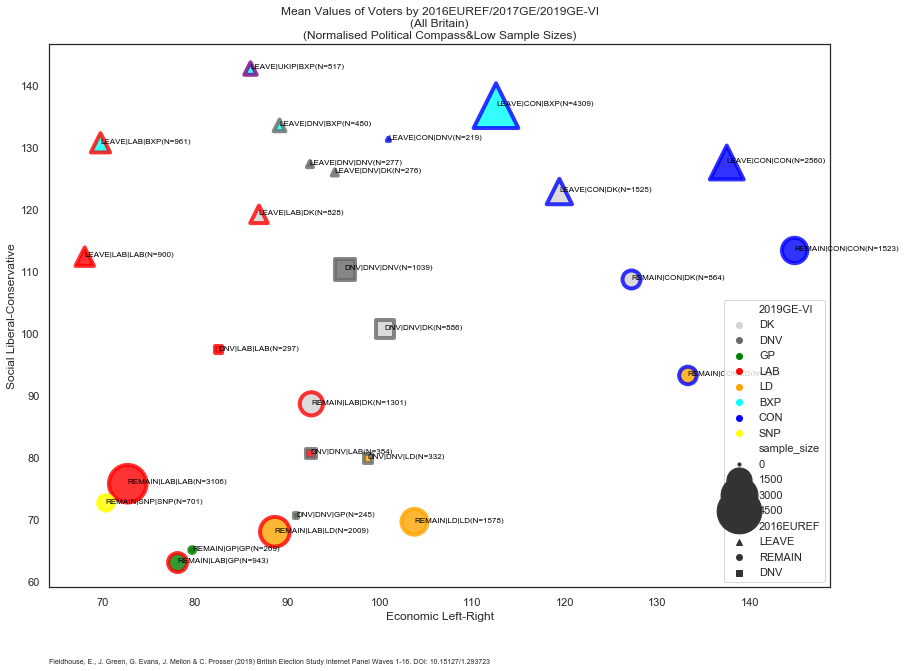

In [289]:
# %%time
# cat_variable = "profile_past_vote_2015"

title = "Mean Values of Voters by 2016EUREF/2017GE/2019GE-VI\n(All Britain)\n(Normalised Political Compass&Low Sample Sizes)"
fig = plt.figure(figsize=(14,10))

# restriction = BES_Panel["country"]=="England"
restriction = None
sample_size_boost=1
min_sample_size = 200

if restriction is None:
    BES = BES_Panel
else:
    BES = BES_Panel[restriction]
# BES = BES_Panel

var_list = ["profile_eurefvote","profile_past_vote_2017","generalElectionVoteW16"]
exposed_final_vote_name = "2019GE-VI"


mask = BES[var_list].notnull().all(axis=1)
cats = BES[var_list].apply(lambda x: x.map(replace_dict)).astype(str).apply(lambda x: "|".join(x),axis=1)
# mask = BES_Panel["profile_eurefvote"].notnull() & BES_Panel["profile_past_vote_2017"].notnull() & BES_Panel["euroElectionVoteW16"].notnull()
# cats = BES_Panel["profile_eurefvote"].map(replace_dict).astype(str)+"|"+BES_Panel["profile_past_vote_2017"].map(replace_dict).astype(str)+"|"+BES_Panel["euroElectionVoteW16"].map(replace_dict).astype(str)
cats[~mask] = np.nan
cats = cats.astype('category')

# cats = BES_Panel[cat_variable]
cat_sample_sizes = cats.value_counts()

cats.cat.remove_categories(cat_sample_sizes[cat_sample_sizes<min_sample_size].index,inplace=True)

cats = cats.apply(lambda x: x+"(N="+str(cat_sample_sizes.loc[x])+")")

# cats = cats.apply(lambda x: x if x in cat_sample_sizes[cat_sample_sizes>500].index else np.nan).astype('category')

# best_al_scale_variable = search(BES,"al_scale",mask=cats.notnull()).sort_values(ascending=False).index[0]
# best_lr_scale_variable = search(BES,"lr_scale",mask=cats.notnull()).sort_values(ascending=False).index[0]

best_weight_variable = search(BES,"wt_",mask=cats.notnull()).sort_values(ascending=False).index[0]
print(best_weight_variable)#,best_al_scale_variable,best_lr_scale_variable)
euro_election_al = pd.crosstab(index   = cats,
                       columns = pan_dataset_allr_values[pan_dataset_allr_values.columns[1]],
                       values  = BES[ best_weight_variable ],
                       aggfunc = sum,
                       normalize='index')
euro_election_al = euro_election_al.apply(lambda x: sum(x*euro_election_al.columns),axis=1)

euro_election_lr = pd.crosstab(index   = cats,
                       columns = pan_dataset_allr_values[pan_dataset_allr_values.columns[0]],
                       values  = BES[ best_weight_variable ],
                       aggfunc = sum,
                       normalize='index')
euro_election_lr = euro_election_lr.apply(lambda x: sum(x*euro_election_lr.columns),axis=1)

# euro_election_al = BES_Panel[best_al_scale_variable].cat.codes.replace(-1,np.nan).groupby(cats).mean()
# euro_election_lr = BES_Panel[best_lr_scale_variable].cat.codes.replace(-1,np.nan).groupby(cats).mean()

df = pd.concat([euro_election_lr,euro_election_al],axis=1).reset_index()
cat_name ="2016EUREF|2017GE|2019GE VI"
lr_scale_name = "Economic Left-Right"
al_scale_name = "Social Liberal-Conservative"
df.columns = [cat_name,lr_scale_name,al_scale_name]

df["2016EUREF"] = df[cat_name].apply(lambda x: x.split("|")[0])
df["2017GE"] = df[cat_name].apply(lambda x: x.split("|")[1])
df[exposed_final_vote_name] = df[cat_name].apply(lambda x: x.split("|")[2].split("(")[0])
df["sample_size"] = df[cat_name].apply(lambda x: int(x.split("|")[2].split("=")[1].split(")")[0]) ).astype('int')
euref_category = pd.api.types.CategoricalDtype( categories=["LEAVE", "REMAIN", "DNV"], ordered=True)
df["2016EUREF"] = df["2016EUREF"].astype(euref_category)


# df = df.drop(0)
from itertools import cycle
filled_markers = cycle(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'])

sct = sns.scatterplot(data=df,x=lr_scale_name,y=al_scale_name, 
                hue=exposed_final_vote_name ,palette = colourmap,style="2016EUREF", markers = ['^','o','s'],
                linewidth=4,edgecolor = df["2017GE"].map(colourmap),size = "sample_size",sizes=(10, 2000),
                alpha=.8)

#  s =df["sample_size"]*sample_size_boost,
#                 label=df[cat_name])
# s=1000,                
                
#                 style=cat_name,
#                 markers=filled_markers);
#                 size="size");

plt.title(title);

# +np.random.rand()*.2
for line in range(0,df.shape[0]):
     sct.text(df[lr_scale_name][line]-0.01, df[al_scale_name][line], 
     df[cat_name][line], horizontalalignment='left', 
     size=8, color='black')#, weight='semibold')

# lgnd = plt.legend(title='Smoker', loc='upper left')
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# plt.show()
# plt.gca().legend()
plt.legend(loc='lower right')
sct.annotate(dataset_citation, (0,0), (0, -70),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) ; 

fname = output_subfolder + title.replace(" ","_").replace("/","").replace("\n","") + ".png"
fig.savefig( fname, bbox_inches='tight' ) 

In [275]:
sct.

In [268]:
(BES_Panel["wt_new_W16"].notnull()&cats.notnull()).sum()

29158

In [149]:
BES_Panel[mask]["al_scaleW16"]

125                8.5
134                6.5
489                  8
594      Authoritarian
680                  5
             ...      
92504                3
92516              NaN
92531              2.5
92554              8.5
92559              8.5
Name: al_scaleW16, Length: 900, dtype: category
Categories (21, object): [Libertarian < 0.5 < 1 < 1.5 ... 8.5 < 9 < 9.5 < Authoritarian]

In [204]:

best_weight_variable = search(BES_Panel,"wt_",mask=BES_Panel[best_al_scale_variable].cat.codes.replace(-1,np.nan).notnull()).sort_values(ascending=False).index[0]
crosstab = pd.crosstab(index   = cats,
                       columns = BES_Panel[best_al_scale_variable].cat.codes.replace(-1,np.nan),
                       values  = BES_Panel[ best_weight_variable ],
                       aggfunc = sum,
                       normalize='index')
crosstab = crosstab.apply(lambda x: sum(x*crosstab.columns),axis=1)

col_0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
row_0,,,,,,,,,,,,,,,,,,,,,
LEAVE|CON|BXP(N=5943),0.000000,0.000473,0.000857,0.000986,0.001305,0.001393,0.004421,0.007998,0.011387,0.018295,...,0.043588,0.062634,0.099143,0.109237,0.134843,0.116787,0.116828,0.093413,0.079285,0.059621
LEAVE|CON|CON(N=679),0.000000,0.000000,0.000000,0.007102,0.005825,0.000000,0.005541,0.004020,0.017604,0.024350,...,0.068946,0.064950,0.083226,0.098644,0.165085,0.125881,0.077985,0.077510,0.066105,0.055296
LEAVE|LAB|BXP(N=1165),0.000000,0.000000,0.000731,0.000000,0.001301,0.004855,0.005443,0.011112,0.023464,0.036470,...,0.047495,0.057950,0.082249,0.115297,0.117976,0.103197,0.112495,0.083154,0.073692,0.066947
LEAVE|LAB|LAB(N=459),0.000000,0.000000,0.006015,0.007347,0.020183,0.018098,0.020623,0.018728,0.040099,0.029251,...,0.051979,0.084211,0.058835,0.081658,0.133219,0.095581,0.085097,0.061758,0.037506,0.066556
LEAVE|UKIP|BXP(N=498),0.000000,0.000000,0.000000,0.000000,0.000000,0.003333,0.004008,0.001649,0.010664,0.007557,...,0.034126,0.053344,0.064159,0.097491,0.100341,0.147889,0.122298,0.138699,0.091976,0.081610
REMAIN|CON|BXP(N=306),0.000000,0.000000,0.000000,0.000000,0.006125,0.000000,0.014264,0.014936,0.008168,0.031350,...,0.054901,0.088885,0.072868,0.125347,0.154161,0.119674,0.075646,0.064038,0.043424,0.048589
REMAIN|CON|CON(N=790),0.000000,0.000000,0.000000,0.001207,0.004087,0.007162,0.019111,0.014398,0.018477,0.043001,...,0.074636,0.091304,0.112592,0.119884,0.156637,0.084396,0.067801,0.052362,0.040963,0.039070
REMAIN|CON|LD(N=829),0.000977,0.001127,0.006842,0.004835,0.011641,0.018072,0.032825,0.042887,0.049114,0.083216,...,0.125721,0.095821,0.095405,0.097133,0.085960,0.055191,0.035658,0.033325,0.023561,0.014196
REMAIN|LAB|CUK(N=310),0.000000,0.005445,0.024092,0.030868,0.025309,0.045177,0.060457,0.082671,0.054259,0.084611,...,0.073202,0.104014,0.057687,0.085242,0.055991,0.044109,0.018029,0.039770,0.005358,0.005521


In [ ]:
########################################################
## VORONOI! ############################################

wt_new_W16
0 0 7 cyan
1 1 19 white
2 2 17 white
3 3 6 red
4 4 11 lightgray
5 5 13 red
6 6 5 lightgray
7 7 18 white
8 8 14 orange
9 9 16 white
10 10 15 orange
11 11 8 blue
12 12 12 green
13 13 10 orange
14 14 9 lightgray


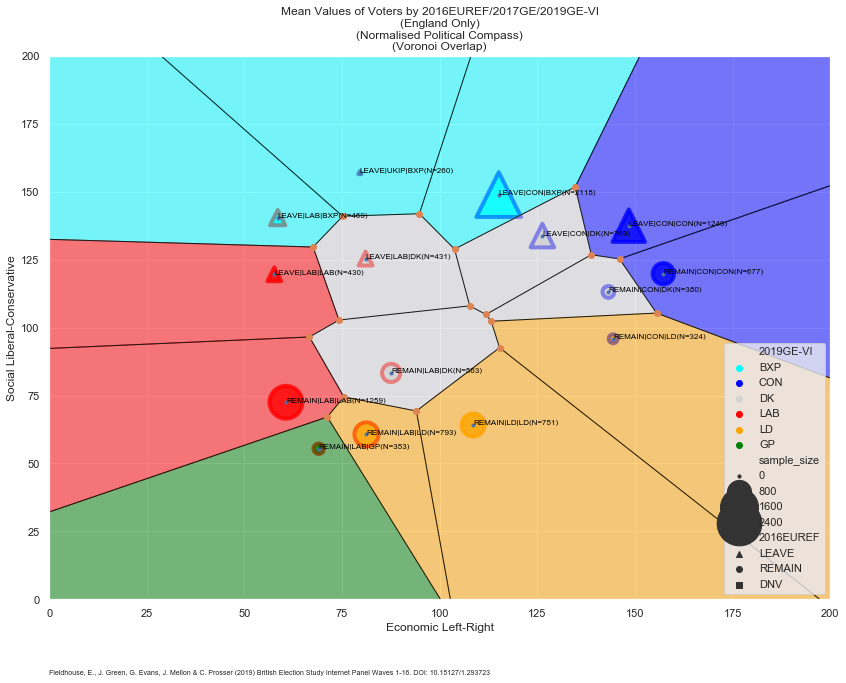

In [192]:
# %%time
# cat_variable = "profile_past_vote_2015"

title = "Mean Values of Voters by 2016EUREF/2017GE/2019GE-VI\n(England Only)\n(Normalised Political Compass)\n(Voronoi Overlap)"
# fig = plt.figure(figsize=(14,10))
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

restriction = BES_Panel["country"]=="England"
# restriction = None
sample_size_boost=1
min_sample_size = 200

if restriction is None:
    BES = BES_Panel
else:
    BES = BES_Panel[restriction]
# BES = BES_Panel

var_list = ["profile_eurefvote","profile_past_vote_2017","generalElectionVoteW16"]
exposed_final_vote_name = "2019GE-VI"


mask = BES[var_list].notnull().all(axis=1)
cats = BES[var_list].apply(lambda x: x.map(replace_dict)).astype(str).apply(lambda x: "|".join(x),axis=1)
# mask = BES_Panel["profile_eurefvote"].notnull() & BES_Panel["profile_past_vote_2017"].notnull() & BES_Panel["euroElectionVoteW16"].notnull()
# cats = BES_Panel["profile_eurefvote"].map(replace_dict).astype(str)+"|"+BES_Panel["profile_past_vote_2017"].map(replace_dict).astype(str)+"|"+BES_Panel["euroElectionVoteW16"].map(replace_dict).astype(str)
cats[~mask] = np.nan
cats = cats.astype('category')

# cats = BES_Panel[cat_variable]
cat_sample_sizes = cats.value_counts()

cats.cat.remove_categories(cat_sample_sizes[cat_sample_sizes<min_sample_size].index,inplace=True)

cats = cats.apply(lambda x: x+"(N="+str(cat_sample_sizes.loc[x])+")")

# cats = cats.apply(lambda x: x if x in cat_sample_sizes[cat_sample_sizes>500].index else np.nan).astype('category')

# best_al_scale_variable = search(BES,"al_scale",mask=cats.notnull()).sort_values(ascending=False).index[0]
# best_lr_scale_variable = search(BES,"lr_scale",mask=cats.notnull()).sort_values(ascending=False).index[0]

best_weight_variable = search(BES,"wt_",mask=cats.notnull()).sort_values(ascending=False).index[0]
print(best_weight_variable)#,best_al_scale_variable,best_lr_scale_variable)
euro_election_al = pd.crosstab(index   = cats,
                       columns = pan_dataset_allr_values[pan_dataset_allr_values.columns[1]],
                       values  = BES[ best_weight_variable ],
                       aggfunc = sum,
                       normalize='index')
euro_election_al = euro_election_al.apply(lambda x: sum(x*euro_election_al.columns),axis=1)

euro_election_lr = pd.crosstab(index   = cats,
                       columns = pan_dataset_allr_values[pan_dataset_allr_values.columns[0]],
                       values  = BES[ best_weight_variable ],
                       aggfunc = sum,
                       normalize='index')
euro_election_lr = euro_election_lr.apply(lambda x: sum(x*euro_election_lr.columns),axis=1)

# euro_election_al = BES_Panel[best_al_scale_variable].cat.codes.replace(-1,np.nan).groupby(cats).mean()
# euro_election_lr = BES_Panel[best_lr_scale_variable].cat.codes.replace(-1,np.nan).groupby(cats).mean()

df = pd.concat([euro_election_lr,euro_election_al],axis=1).reset_index()
cat_name ="2016EUREF|2017GE|2019GE VI"
lr_scale_name = "Economic Left-Right"
al_scale_name = "Social Liberal-Conservative"
df.columns = [cat_name,lr_scale_name,al_scale_name]

df["2016EUREF"] = df[cat_name].apply(lambda x: x.split("|")[0])
df["2017GE"] = df[cat_name].apply(lambda x: x.split("|")[1])
df[exposed_final_vote_name] = df[cat_name].apply(lambda x: x.split("|")[2].split("(")[0])
df["sample_size"] = df[cat_name].apply(lambda x: int(x.split("|")[2].split("=")[1].split(")")[0]) ).astype('int')
euref_category = pd.api.types.CategoricalDtype( categories=["LEAVE", "REMAIN", "DNV"], ordered=True)
df["2016EUREF"] = df["2016EUREF"].astype(euref_category)


# df = df.drop(0)
from itertools import cycle
filled_markers = cycle(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'])

sct = sns.scatterplot(data=df,x=lr_scale_name,y=al_scale_name, 
                hue=exposed_final_vote_name ,palette = colourmap,style="2016EUREF", markers = ['^','o','s'],
                linewidth=4,edgecolor = df["2017GE"].map(colourmap),size = "sample_size",sizes=(10, 2000),
                alpha=.8)

#  s =df["sample_size"]*sample_size_boost,
#                 label=df[cat_name])
# s=1000,                
                
#                 style=cat_name,
#                 markers=filled_markers);
#                 size="size");

plt.title(title);

# +np.random.rand()*.2
for line in range(0,df.shape[0]):
     sct.text(df[lr_scale_name][line]-0.01, df[al_scale_name][line], 
     df[cat_name][line], horizontalalignment='left', 
     size=8, color='black')#, weight='semibold')

# lgnd = plt.legend(title='Smoker', loc='upper left')
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# plt.show()
# plt.gca().legend()
plt.legend(loc='lower right')
sct.annotate(dataset_citation, (0,0), (0, -70),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) ; 

fname = output_subfolder + title.replace(" ","_").replace("/","").replace("\n","") + ".png"

#######

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# make up data points
# points = np.random.rand(15,2)
points = df[df.columns[1:3]].values
points = np.append(points, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)

# compute Voronoi tesselation
vor = Voronoi(points)

# plot
voronoi_plot_2d(vor, ax=ax);

# colorize
colour_count = 0
point_colours = np.append(["white"],np.append(df[exposed_final_vote_name].map(colourmap).values,["white","white","white","white"]))
for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), alpha=.5, color = point_colours[r+1])
        print(r,colour_count,vor.point_region[colour_count],point_colours[vor.point_region[colour_count]])
        colour_count = colour_count +1

plt.xlim([0,200]);
plt.ylim([0,200]);
plt.show();

fig.savefig( fname, bbox_inches='tight' ) 

In [186]:
df

,2016EUREF|2017GE|2019GE VI,Economic Left-Right,Social Liberal-Conservative,2016EUREF,2017GE,2019GE-VI,sample_size
0,LEAVE|CON|BXP(N=2118),115.122159,148.926743,LEAVE,CON,BXP,2118
1,LEAVE|CON|CON(N=1240),148.422861,137.497622,LEAVE,CON,CON,1240
2,LEAVE|CON|DK(N=769),126.285579,133.844318,LEAVE,CON,DK,769
3,LEAVE|LAB|BXP(N=469),58.539691,140.468837,LEAVE,LAB,BXP,469
4,LEAVE|LAB|DK(N=431),81.032311,125.387178,LEAVE,LAB,DK,431
5,LEAVE|LAB|LAB(N=430),57.666865,119.603953,LEAVE,LAB,LAB,430
6,LEAVE|UKIP|BXP(N=260),79.538178,157.017363,LEAVE,UKIP,BXP,260
7,REMAIN|CON|CON(N=677),157.260025,119.813118,REMAIN,CON,CON,677
8,REMAIN|CON|DK(N=380),143.189773,113.116121,REMAIN,CON,DK,380
9,REMAIN|CON|LD(N=324),144.411591,95.887430,REMAIN,CON,LD,324


In [143]:
vor.point_region

array([ 7, 19, 17,  6, 11, 13,  5, 18, 14, 16, 15,  8, 12, 10,  9,  1,  4,
        2,  3], dtype=int64)

In [184]:
point_colours[vor.point_region]

array(['cyan', 'white', 'white', 'red', 'lightgray', 'red', 'lightgray',
       'white', 'orange', 'white', 'orange', 'blue', 'green', 'orange',
       'lightgray', 'cyan', 'cyan', 'blue', 'lightgray'], dtype=object)

In [149]:

point_colours

array(['white', 'cyan', 'blue', 'lightgray', 'cyan', 'lightgray', 'red',
       'cyan', 'blue', 'lightgray', 'orange', 'lightgray', 'green', 'red',
       'orange', 'orange', 'white', 'white', 'white', 'white'],
      dtype=object)

array([ 7, 19, 17,  6, 11, 13,  5, 18, 14, 16, 15,  8, 12, 10,  9,  1,  4,
        2,  3], dtype=int64)

In [168]:
vor.points

array([[ 115.12215854,  148.92674267],
       [ 148.42286074,  137.49762195],
       [ 126.28557904,  133.84431795],
       [  58.53969062,  140.46883654],
       [  81.03231125,  125.38717752],
       [  57.66686453,  119.60395297],
       [  79.53817823,  157.01736288],
       [ 157.26002511,  119.81311816],
       [ 143.18977348,  113.1161213 ],
       [ 144.41159114,   95.8874299 ],
       [  87.58197078,   83.31346322],
       [  69.03202344,   55.43029356],
       [  60.6418006 ,   72.52189565],
       [  81.25168422,   60.70409379],
       [ 108.55179363,   64.13660115],
       [ 999.        ,  999.        ],
       [-999.        ,  999.        ],
       [ 999.        , -999.        ],
       [-999.        , -999.        ]])

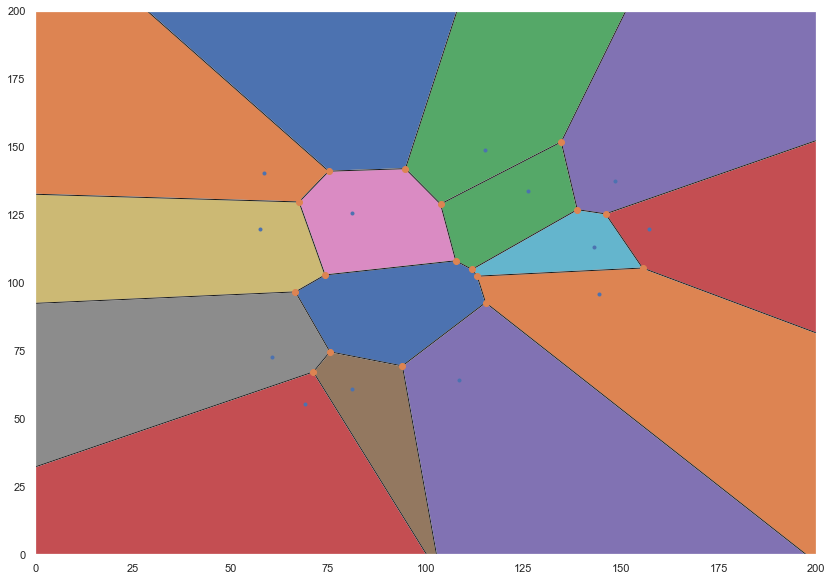

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# make up data points
# points = np.random.rand(15,2)
points = df[df.columns[1:3]].values
points = np.append(points, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)

# compute Voronoi tesselation
vor = Voronoi(points)
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
# plot
voronoi_plot_2d(vor, ax=ax);

# colorize
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))

plt.xlim([0,200]);
plt.ylim([0,200]);
plt.show();

In [165]:
points

array([[ 115.12215854,  148.92674267],
       [ 148.42286074,  137.49762195],
       [ 126.28557904,  133.84431795],
       [  58.53969062,  140.46883654],
       [  81.03231125,  125.38717752],
       [  57.66686453,  119.60395297],
       [  79.53817823,  157.01736288],
       [ 157.26002511,  119.81311816],
       [ 143.18977348,  113.1161213 ],
       [ 144.41159114,   95.8874299 ],
       [  87.58197078,   83.31346322],
       [  69.03202344,   55.43029356],
       [  60.6418006 ,   72.52189565],
       [  81.25168422,   60.70409379],
       [ 108.55179363,   64.13660115],
       [ 999.        ,  999.        ],
       [-999.        ,  999.        ],
       [ 999.        , -999.        ],
       [-999.        , -999.        ]])

In [91]:
# sum(crosstab.loc[crosstab.index[0]]*crosstab.columns)

In [90]:
# search(BES_Panel,"wt_",mask = BES_Panel[best_al_scale_variable].cat.codes.replace(-1,np.nan).notnull()).sort_values()

In [89]:
# pd.crosstab(index = BES_Panel[best_al_scale_variable].cat.codes.replace(-1,np.nan), )

In [88]:
# BES_Panel["profile_past_vote_2017"].map({'British National Party (BNP)':"BNP",
#                                           'Conservative':"CON",
#                                           "Don't know":"DK",
#                                           "Green Party":"GRN",
#                                           "Labour":"LAB",
#                                           "Liberal Democrat":"LD",
#                                           "Other":"OTH",
#                                           "Plaid Cymru":"PC",
#                                           'Scottish National Party (SNP)':"SNP",
#                                           'United Kingdom Independence Party (UKIP)':"UKIP"                                       
                                         
#                                          }).value_counts()

In [87]:
# BES_Panel["profile_past_vote_2017"].map(replace_dict).value_counts()

In [86]:
# party_map = {'British National Party (BNP)':"BNP",
#                                           'Conservative':"CON",
#                                           "Don't know":"DK",
#                                           "Green Party":"GRN",
#                                           "Labour":"LAB",
#                                           "Liberal Democrat":"LD",
#                                           "Other":"OTH",
#                                           "Plaid Cymru":"PC",
#                                           'Scottish National Party (SNP)':"SNP",
#                                           'United Kingdom Independence Party (UKIP)':"UKIP",                                  
#                                           "Brexit Party":"BXP",
#                                           'Change UK- The Independent Group':"CUK",
#                                           "Leave the EU":"LEAVE",
#                                           "Stay/remain in the EU":"REMAIN"
#                                          }

In [85]:
# BES_Panel["euroElectionVoteW16"].map().value_counts()

In [84]:
# BES_Panel["euroElectionVoteW16"].cat.categories

In [83]:
# cats.value_counts()

In [82]:
# mask = BES_Panel["profile_eurefvote"].notnull() & BES_Panel["profile_past_vote_2017"].notnull() & BES_Panel["euroElectionVoteW16"].notnull()
# df = BES_Panel["profile_eurefvote"].astype('str')+"|"+BES_Panel["profile_past_vote_2017"].astype('str')+"|"+BES_Panel["euroElectionVoteW16"].astype('str')
# df[~mask] = np.nan